# Анализ рынка вакансий для HR Агенства

**Цель**

Выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства.

__Описание данных__

- `id` - Уникальный идентификатор вакансии
- `Статус` - Статус вакансии. Категориальное значение. Возможные значения:
     - **Архив** - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства;
     - **Закрыта нами** - вакансия закрыта, подходящая кандидатура найдена силами агентства;
     - **Активна** - вакансия опубликована, идет активный поиск кандидатов;
     - **На рассмотрении** - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
     - **Отклонена** - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется;
- `Менеджер` - Менеджер, ответственный за вакансию. Возможны пустые значения в связи с тем, что это поле сначала не существовало, потом было не обязательным к заполнению.
- `Дата публикации` - Дата, когда вакансия была опубликована на сайте КА.
- `Дата закрытия` - Дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии.
- `Количество просмотров` - Количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию.
- `Количество откликов` - Количество уникальных пользователей сайта, отправивших отклик на вакансию.
- `Позиция` - Название вакансии
- `Зарплата от` - Нижняя граница заработной платы для вакансии. Поля может быть пустым.
- `Зарплата до` - Верхняя граница заработной платы для вакансии. Поле может быть пустым.
- `Город` - В каких городах предлагается работа вне зависимости от формата. Например, может быть указан город Москва - при этом занятость необязательно офисная, поэтому кандидат может находиться в другой локации.
- `Формат оформления` - Какой формат оформления предлагает заказчик.
- `Формат работы` - Какой формат работы предлагает заказчик.
- `Опыт` - Какой опыт работы должен быть у соискателя.
- `Образование` - Какое образование должно быть у соискателя.
- `Ссылка на тестовое` - Есть ли ссылка на тестовое задание в описании вакансии.
- `Занятость` - Какой формат занятости предлагает заказчик.
- `Обязательные требования` - Какие обязательные требования предъявляет заказчик к кандидатам.
- `Дополнительный требования` - Какие дополнительные требования предъявляет заказчик к кандидатам.
- `Этапы отбора` - Этапы отбора на должность
- `Условия` - Краткое текстовое описание условий вакансии. Может повторять информацию из других столбцов.

__Шаги исследования__

1 Открыть файл с данными и изучить общую информацию

2  Предобработка данных

3  Исследовательский анализ данных
<ul>3.1  Общие статистические данные количества просмотров, откликов и период закрытия вакансии
</ul></ul>
<ul>3.2 Матрица корреляций</ul></ul>      
<ul>3.3 Сравнение количества просмотров и откликов по признакам
<ul>3.3.1 Сравним количество просмотров и откликов по месяцам публикации и закрытия
<br>3.3.2 Сравним количество просмотров и откликов по городам
<br>3.3.3 Сравним количество просмотров и откликов по позициям
<br>3.3.4 Сравним количество просмотров и откликов по заработной плате
<br>3.3.5 Сравним количество просмотров и откликов по формату оформления
<br>3.3.6 Сравним количество просмотров и откликов по формату работы
<br>3.3.7 Сравним количество просмотров и откликов по опыту
<br>3.3.7 Сравним количество просмотров и откликов по занятости    
</ul></ul>

4 Выдвижение гипотез и их опровержение / проверка
<ul>4.1 Гипотеза № 1. Вакансии в области разработки пользуются большим спросом, чем из других областей
<br>4.2 Гипотеза № 2 о различии среднего количества просмотров у вакансий, представленных в Москве и вакансий в других городах
<br>4.3 Гипотеза № 3 о различии среднего количества откликов у вакансий с указанием заработной платы и без указания
<br>4.4 Гипотеза № 4 о различии среднего количества просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие
<br>4.5 Гипотеза № 5 о различии среднего количества просмотров у вакансий в области разработки и в других обастях
<br>4.6 Гипотеза № 6 о различии среднего количества просмотров у вакансий, закрытых кадровым агенством и закрытых/отклоненых другими
</ul>
5  Итоговые выводы и рекомендации для заказчика

__Ссылка на презентацию:__

https://drive.google.com/drive/folders/1l9tuYKKtEgGYXHcACa0I8UqpmT8KV_XM

## Открыть файл с данными и изучить общую информацию

In [ ]:
#!pip install phik

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import mannwhitneyu

import warnings; warnings.filterwarnings(action='ignore')

import phik
from phik import resources, report

# убираем ограничения по столбцам и строкам
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# ставим ограничение по количеству выводимых знаков после запятой в типе данных float
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data = pd.read_excel(r'C:\Users\user\Downloads\vacancy_clear.xlsx')

In [4]:
# создадим функцию для посмотра содержимого таблицы, общей информации, количества пропусков, 
# описательной статистики и количества явных дубликатов
def general_info(df):
    display(df.head(1))
    print('___________________________')
    print('')
    display(df.info())
    print('___________________________')
    print('')
    display(df.isna().sum())
    print('___________________________')
    print('')
    display(df.describe())
    print('___________________________')
    print('')
    print('Количество дубликатов:', df.duplicated().sum())
    
# выведем на экран  
general_info(data)

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,Зарплата до,Город,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стажировка для НКО),NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nПожелания:\n- Опыт использования одного из фреймворков/библиотек для написания сервисов на RESTful API\n- Понимание как работает асинхронность и многопоточность в Python\n- Знание основ Git\n- Базовое знание SQL","Основные требования к ребятам, которые хотели бы пройти практику в школе IT - это:\n- 8+ месяцев обучения на соответсвующем направлении\n- Один или несколько законченных pet проектов\n\nОстальные требования - это больше пожелания, нежели твердые требования. \n\nЕсли человек закончил 8-12 месяцев обучения, то он скорее всего уже успел познакомиться с перечисленным выше стеком (на поверхностном уровне)",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nСтажировка не оплачивается участникам.\n\nВ конце проекта ты сразу сможешь пополнить им своё портфолио. Проект будет реализован людьми для людей.


___________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   Статус                     1284 non-null   object 
 2   Источник лида              1274 non-null   object 
 3   Менеджер                   1193 non-null   object 
 4   Дата публикации            1284 non-null   object 
 5   Дата закрытия              1127 non-null   object 
 6   Количество просмотров      1284 non-null   int64  
 7   Количество откликов        1284 non-null   int64  
 8   Позиция                    1284 non-null   object 
 9   Зарплата от                469 non-null    float64
 10  Зарплата до                372 non-null    float64
 11  Город                      1284 non-null   object 
 12  Формат оформления          1284 non-null   object 
 13  Формат работы      

None

___________________________



id                             0
Статус                         0
Источник лида                 10
Менеджер                      91
Дата публикации                0
Дата закрытия                157
Количество просмотров          0
Количество откликов            0
Позиция                        0
Зарплата от                  815
Зарплата до                  912
Город                          0
Формат оформления              0
Формат работы                  0
Опыт                           0
Образование                    0
Занятость                      0
Ссылка на тестовое             0
Обязательные требования        0
Дополнительный требования    625
Этапы отбора                   0
Условия                        0
dtype: int64

___________________________



,id,Количество просмотров,Количество откликов,Зарплата от,Зарплата до
count,"1,284.00","1,284.00","1,284.00",469.00,372.00
mean,"1,168.13",40.19,11.51,"47,064.71","74,808.91"
std,530.71,38.71,12.66,"25,321.88","41,501.84"
min,40.00,1.00,1.00,0.00,0.00
25%,696.75,15.00,4.00,"30,000.00","50,000.00"
50%,"1,171.50",30.00,8.00,"40,000.00","65,000.00"
75%,"1,635.50",51.00,15.00,"60,000.00","100,000.00"
max,"2,073.00",317.00,151.00,"150,000.00","250,000.00"


___________________________

Количество дубликатов: 0


Из увиденной общей информации видим, что представлено 22 столбца и 1284 строки. Явные дубликаты отсутствуют.

Нам необходимо провести следующую предобработку:
- заменить названия столбцов на удобные для нас;
- поменять типы данных в столбцах с датами;
- проанализировать пропуски, по возможности восстановить.

## Предобработка данных

__Переименуем названия столбцов__

In [5]:
# Смотрим назнания столбцов
data.columns

Index(['id', 'Статус', 'Источник лида', 'Менеджер', 'Дата публикации',
       'Дата закрытия', 'Количество просмотров', 'Количество откликов',
       'Позиция', 'Зарплата от', 'Зарплата до', 'Город', 'Формат оформления',
       'Формат работы', 'Опыт', 'Образование', 'Занятость',
       'Ссылка на тестовое', 'Обязательные требования',
       'Дополнительный требования', 'Этапы отбора', 'Условия'],
      dtype='object')

In [6]:
# Переименуем названия столбцов на удобные для нас
data.columns = [
    'id', 'status', 'lead_source', 'manager', 'publication_date','closing_date', 
    'views', 'responses', 'position', 'salary_from', 'salary_to', 
    'city', 'format_registration', 'work_format', 'experience', 'education', 
    'employment', 'link_test', 'mandatory_requirements', 'additional_requirements', 
    'selection_stages', 'conditions'
]

In [7]:
# Выведем на экран
data.columns

Index(['id', 'status', 'lead_source', 'manager', 'publication_date',
       'closing_date', 'views', 'responses', 'position', 'salary_from',
       'salary_to', 'city', 'format_registration', 'work_format', 'experience',
       'education', 'employment', 'link_test', 'mandatory_requirements',
       'additional_requirements', 'selection_stages', 'conditions'],
      dtype='object')

__Посмотрим, какие статусы имеют вакансии__

In [8]:
# Посмотрим уникальные значения в столбце status
print('Статусы вакансий:')
print()
print(data['status'].value_counts())

Статусы вакансий:

Архив              701
Закрыта нами       320
Отклонена          105
На рассмотрении     90
Активна             68
Name: status, dtype: int64


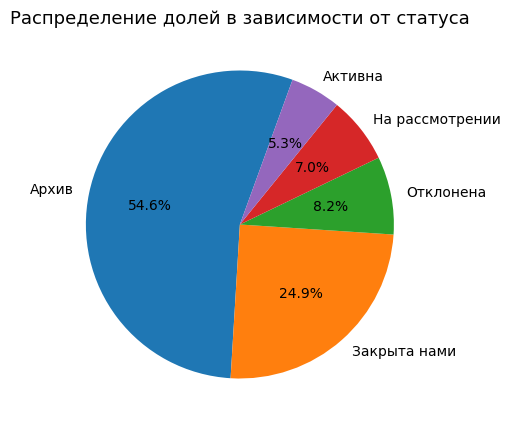

In [9]:
# Строим круговую диакгамму распределения долей в зависимости от статуса
plt.figure(figsize=(10, 5))
data['status'].value_counts().plot(kind = 'pie', startangle=70, autopct='%1.1f%%')
plt.title('Распределение долей в зависимости от статуса', fontsize=13)
plt.ylabel(' ')
plt.show()

Видим __5 статусов__ и как они распределены по долям:
- **Архив** - больше половины вакансий (54,6%) закрыты не кадровым агенством (далее КА).
- **Закрыта нами** - почти 25% закрыло КА.
- **Отклонена** - 8,2% были отклонены заказчиком.
- **На рассмотрении** - по 7% вакансий кандидаты отобраны, заказчик осуществляет отбор.
- **Активна** - по 5,3% вакансий КА ведет поиск.

__Посмотрим из каких источников к нам поступали вакансии и долю их пропусков__

In [10]:
# Посмотрим уникальные значения в столбце lead_source
print('Источники вакансий:')
print()
print(data['lead_source'].value_counts())

print('---------------')
# Посмотрим долю пропусков
print('Доля пропусков в колонке lead_source - '
      f'{data["lead_source"].isna().sum()/len(data):.1%}')
print('---------------')

# Выведем на экран таблицу с пропущенными значениями источника вакансий
data[data['lead_source'].isna()]

Источники вакансий:

Повторная          511
Сорсинг            330
Входящая заявка    217
Реферальная        216
Name: lead_source, dtype: int64
---------------
Доля пропусков в колонке lead_source - 0.8%
---------------


,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,mandatory_requirements,additional_requirements,selection_stages,conditions
5,281,Закрыта нами,NaN,менеджер 9,2023-01-09,2023-01-24,29,6,Фронтенд разработчик на проект,NaN,"19,000.00",Ростов-на-Дону,"Самозанятость, ИП",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Проектная,нет,"- владение JavaScript,_x000D_\n- готовность к проектной занятости и сжатым срокам",NaN,1. Скрининг портфолио_x000D_\n2. Собеседование с руководителем направления и hr-менеджером,"Стек: JavaScript _x000D_\nСрок выполнения: 15 рабочих дней _x000D_\nЗП: на личном обсуждении _x000D_\nДля кого: junior, middle _x000D_\nЗанятость: проектная/частичная"
12,288,Архив,NaN,NaN,2023-01-11,2023-03-02,12,1,PR-менеджер,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор","Офис, Гибрид","До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Полная,нет,"— Заряд энергии и организаторские способности: ты будешь постоянно знакомиться с новыми людьми и делать разные маркетинговые активности;_x000D_\n_x000D_\n— Легкость в общении с людьми и умение налаживать контакты;_x000D_\n_x000D_\n— Желание обучаться: заинтересован в digital-маркетинге и готов развиваться в PR в условиях неопределенности;_x000D_\n_x000D_\n— Желательно наличие связей, знакомства в около digital-сфере;_x000D_\n_x000D_\n— Опыт в СМИ, SMM и в event будет плюсом;_x000D_\n_x000D_\n— Знание английского языка на уровне разговорного обязателен.",NaN,"— Телефонное интервью -> Тестовое задание -> Знакомство с руководителем -> согласование оффера._x000D_\n_x000D_\nЭтапы займут не более 7 дней и подробный фидбек дается после каждого этапа._x000D_\n_x000D_\n*Тестовое задание присылается кандидатам без опыта, с опытными кандидатами ведется общение по проектам","— Возможность развития в российском и международном digital: в наших планах наращивать клиентов на разных рынках;_x000D_\n_x000D_\n— В нашем коллективе быстро растут по карьерной лестнице те, кто готов прикладывать усилия для достижения результата;_x000D_\n_x000D_\n— Сохраняем комфортную рабочую среду в формате гибридного офиса: у нас гибкое начало рабочего дня (с 9:00 до 11:00 утра), минимум бюрократии и согласований, и коллеги, которые всегда открыты к взаимопомощи;_x000D_\n_x000D_\n— Корпоративные скидки на курсы английского языка Skyeng, курсы Skillbox;_x000D_\n_x000D_\n— Предлагаем возможности самореализации - делимся экспертизой на digital-конференциях, проводим внутренние обучения и расширяем направления агентства."
16,295,Архив,NaN,NaN,2023-01-12,2023-03-04,14,2,Стажер SMM проектов,0.00,0.00,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное","Стажировка, Проектная, Частичная",нет,"🔸базовые знания в составлении стратегии продвижения, анализе ЦА и конкурентов_x000D_\n🔸базовые знания в СММ_x000D_\n🔸грамотная устная и письменная речь_x000D_\n🔸 умение работать с гугл документами_x000D_\n🔸желание работать и обучаться_x000D_\n🔸любые другие знания будут плюсом",NaN,"Скрининг резюме, собеседование","Длительность стажировки: 6 недель, будьте готовы тратить не менее 2-4 ч/день._x000D_\n_x000D_\nПосле стажировки мы предоставляем сертификат о прохождении и лучших берем в платные проекты."
21,302,Архив,NaN,NaN,2023-01-16,2023-02-08,18,2,Руководитель проектов по рекламе (маркетолог),"30,000.00","60,000.00",Челябинск,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Полная,нет,"— опыт работы в сфере интернет-маркетинга от 2 лет_x000D_\n— работа специалистом по рекламе или SEO от 1 года_x000D_\n— активность, нацеле

Пропуски носят полностью случайный характер, техническая ошибка при сборе данных. Заменим пропущенные значения на "Неизвестен".

In [11]:
# Заменим пропуски на "неизвестен"
data['lead_source'] = data['lead_source'].fillna('Неизвестен')

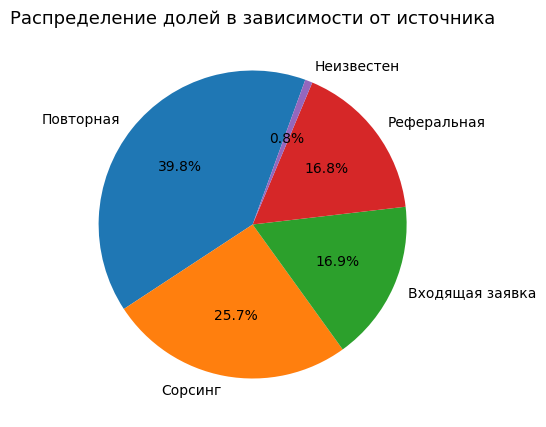

In [12]:
# Строим круговую диаграмму распределения долей в зависимости от источника
plt.figure(figsize=(10, 5))
data['lead_source'].value_counts().plot(kind = 'pie', startangle=70, autopct='%1.1f%%')
plt.title('Распределение долей в зависимости от источника', fontsize=13)
plt.ylabel(' ')
plt.show()

Имеем 4 источника вакансий и 0,8% неизвестных источников:
- **Повторная** - 39,8% ваканий поступает от действующих заказчиков, которые не в первый раз обращаются в КА.
- **Сорсинг** - почти 25,7% вакансий это впервые привлеченные заказчики через активный поиск непосредственно КА.
- **Входящая заявка** - самостоятельное обращение заказчика, через сайт КА (16,9%).
- **Реферальная** - обращение заказчика по рекомендации от другого заказчика (16,8%).

__Изучим поле ответственных менеджеров, долю и природу пропусков в нем__

In [13]:
# Посмотрим уникальные значения в столбце manager
print('Ответственные менеджеры:')
print()
print(data['manager'].value_counts())

print('---------------')
# Посмотрим долю пропусков
print('Доля пропусков в колонке manager - '
      f'{data["manager"].isna().sum()/len(data):.1%}')
print('---------------')

# Выведем на экран первые 5 строк таблицы с пропущенными значениями ответственных менеджеров
data[data['manager'].isna()].head()

Ответственные менеджеры:

менеджер 9    559
менеджер 1    227
менеджер 5    158
менеджер 7    135
менеджер 3     65
менеджер 2     38
менеджер 6      9
менеджер 8      1
менеджер 4      1
Name: manager, dtype: int64
---------------
Доля пропусков в колонке manager - 7.1%
---------------


,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,mandatory_requirements,additional_requirements,selection_stages,conditions
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Офис,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо последние курсы государственного технического ВУЗа_x000D_\n- Базовое понимание физической модели данных одной из промышленных БД_x000D_\n- Владение SQL на базовом уровне (навыки в написании простых запросов),"- Базовое понимание объектов БД и их применение_x000D_\n- Опыт участия в проекте разработки информационных систем_x000D_\n- Навыки владения процедурными языками СУБД (PL/SQL, T-SQL ...)_x000D_\n- Навыки в написании сложных запросов SQL_x000D_\n- Навыки владения средствами проектирования БД (ErWin, Power Designer ...)",- Скрининг резюме_x000D_\n- Техническое интервью с HR_x000D_\n- Интервью с тех. специалистом_x000D_\n- ДЗ_x000D_\n- Интервью с тимлидом/руководителем,"У нас вы получите возможность:_x000D_\n- Работать с крупнейшими компаниями России и СНГ_x000D_\n- Развиваться в команде профессионалов высокого уровня!_x000D_\n- Идти вперед по карьерной лестнице при поддержке опытных наставников_x000D_\n- Получать профессиональное обучение и сертификацию за счёт компании_x000D_\n_x000D_\nПричины выбрать именно нас:_x000D_\n- Стабильный оклад + премия по итогам года/проекта._x000D_\n- Гибкий график (от 32 часов в неделю в будние дни), возможен гибридный формат_x000D_\n- Завтраки и фрукты в офисе._x000D_\n- Наша гордость - молодой дружный коллектив._x000D_\n- Так как в офисе мы проводим большую часть времени, мы сделали все для того, чтобы тут было комфортно: игровая комната с play station, пуфиками и синтезатором; спортивный зал с Германом, одним тренажером, кикером и столом для малого тенниса; лунки для гольфа; яблоки и бананы в вазах; три вида каши по утрам!_x000D_\n- Профессиональное обучение и сертификацию за счёт компании._x000D_\n- Соцпакет."
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,NaN,Москва,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","На смежных специальностях, Профильное",Полная,нет,"- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образование,_x000D_\n- Технический английский язык_x000D_\n- Владение SQL на базовом уровне (навыки в написании простых запросов),_x000D_\n- Навыки владения средствами проектирования БД (ErWin, Power Designer)","Базовое понимание объектов БД и их применение_x000D_\nОпыт участия в проекте разработки информационных систем_x000D_\nНавыки владения процедурными языками СУБД (PL/SQL, T-SQL)_x000D_\nНавыки в написании сложных запросов SQL_x000D_\nБазовое понимание физической модели данных одной из промышленных БД",1. Скрининг резюме_x000D_\n2. Тестовое задание_x000D_\n3. Интервью,"Стабильный оклад + премия по итогам года/проекта._x000D_\nГибкий график (от 32 часов в неделю в будние дни)._x000D_\nЗавтраки и фрукты в офисе._x000D_\nНаша гордость - молодой дружный коллектив._x000D_\nТак как в офисе мы проводим большую часть времени, мы сделали все для того, чтобы тут было комфортно: игровая комната с play station, пуфиками и синтезатором; спортивный зал с Германом, одним тренажером, кикером и столом для малого тенниса; лунки для гольфа; яблоки и бананы в вазах; три вида каши по утрам!_x000D_\nПрофессиональное обучение и сертификацию за счёт компании._x000D_\nСоцпакет."
8,284,Архив,Входящая заявка,NaN,2023-01-10,2023-06-15,99,3,Project-manager,"50,000.00",NaN,Москва,"Самозанятость, ИП",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Полная,да,"- Системность, структурность, четкость. Нужен четкий контроль команды и 

Работу ведут 9 менеджеров. Пропущенных значений 7,1%. Есть информация, что данное поле ранее отсутствовало, либо было необязательно к заполнению. Заполним пропущенные значения как "Не установлен".

In [14]:
# Заменим пропуски на 'Не установлен'
data['manager'] = data['manager'].fillna('Не установлен')

__Поработаем с полями дат публикации и закрытия__

Необходимо преобразовать данные в этих полях в тип данных `datetime`, изучить пропуске в поле **Дата публикации**, а также создать поле с количеством дней закрытия вакансии.

In [15]:
# преобразуем данные о дате
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['closing_date'] = pd.to_datetime(data['closing_date'])

In [16]:
print(f"Публикация вакансий проходила с {data['publication_date'].min()} по {data['publication_date'].max()},")
print(f"а закрытие с {data['closing_date'].min()} по {data['closing_date'].max()}.")

Публикация вакансий проходила с 2023-01-09 00:00:00 по 2023-12-29 00:00:00,
а закрытие с 2023-01-24 00:00:00 по 2024-01-09 00:00:00.


In [17]:
# Посмотрим на количество пропусков в столбце closing_date
print('Количество пропусков в поле даты закрытия вакансии - ', data['closing_date'].isna().sum())

Количество пропусков в поле даты закрытия вакансии -  157


Данные вакансии могут не иметь даты закрытия только по причине еще активности вакансии, а соответственно, иметь статусы **На рассмотрении** или **Активна**. Проверим, так ли это? 

In [18]:
# Делаем срез таблицы по пустым значения поля closing_date
# и смотрим уникальные значения по полю status
data[data['closing_date'].isna()]['status'].value_counts()

На рассмотрении    89
Активна            68
Name: status, dtype: int64

Наше предположение оказалось верным, пропуски в датах закрытия вакансий только с этими статусами. Соответственно они неслучайные, удалять не будем.

Создадим поле с количеством дней закрытия вакансии.

In [19]:
# Создаем поле 'period' с разницей от даты публикации до даты закрытия 
# и переведем его в целочисленный формат
data['period'] = data['closing_date'] - data['publication_date']
data['period'] = data['period'].dt.days.astype('Int32')

# Выведем на экран
data.head()

,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,mandatory_requirements,additional_requirements,selection_stages,conditions,period
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стажировка для НКО),NaN,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nПожелания:\n- Опыт использования одного из фреймворков/библиотек для написания сервисов на RESTful API\n- Понимание как работает асинхронность и многопоточность в Python\n- Знание основ Git\n- Базовое знание SQL","Основные требования к ребятам, которые хотели бы пройти практику в школе IT - это:\n- 8+ месяцев обучения на соответсвующем направлении\n- Один или несколько законченных pet проектов\n\nОстальные требования - это больше пожелания, нежели твердые требования. \n\nЕсли человек закончил 8-12 месяцев обучения, то он скорее всего уже успел познакомиться с перечисленным выше стеком (на поверхностном уровне)",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nСтажировка не оплачивается участникам.\n\nВ конце проекта ты сразу сможешь пополнить им своё портфолио. Проект будет реализован людьми для людей.,0
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,NaN,Москва,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бывают языки программирования и для чего они используются.\n2) Владение хотя быть одним современным языком программирования (Java, Python, PHP, C#, Go, JavaScript и/или C++), желательно знание на базовом уровне языка запросов SQL и базовые навыки вёрстки веб-страниц (HTML/CSS).\n3) Свободное владение разговорным английским языком.\n4) Системность, аналитический склад ума и умение чувствовать других людей.\n5) Желание и готовность проводить собеседования и оценивать специалистов",NaN,1) тестовое задание\n2) онлайн собеседование с менеджером проектов\n3) онлайн собеседование с СОО или СЕО,ставка 750 рублей - за 1 обработанного кандидата (проведено собеседование + написано заключение по нему) \nПолная удаленка\nОбучение,0
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,"100,000.00",Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,"умение самостоятельно разбираться в чужом коде;_x000D_\nопыт самостоятельной работы над коммерческими проектами;_x000D_\nспособность к самоорганизации и самодисциплине;_x000D_\nумение оценивать трудоемкость задачи и планировать свое рабочее время;_x000D_\nнаходится на связи большую часть рабочего дня (время по МСК);_x000D_\nумение грамотно изложить свои вопросы/идеи._x000D_\n_x000D_\nопыт верстки (CSS 3, Flex и Sass);_x000D_\nхороший уровень знания Javascript и его асинхронных особенностей;_x000D_\nхорошее знание Vue.js v2 (понимание реактивных свойств, умение работать с компонентами);_x000D_\nопыт работы с Node JS и Express;_x000D_\nхорошее знание синтаксиса SQL, умение читать и писать не простые запросы (у нас PostgreSQL);_x000D_\nумение обсуждать ход проекта с другими участниками (используем Telegram, Zoom);_x000D_\nспособность внятно документировать свой код.",Опыт коммерческой разработки на JS будет большим преимуществом.,"- Отклик с сопроводительным письмом обязательно! Коротко рассказать о себе (навыки, заслуги, увлечения), о проектах, в которых довелось участвовать, о своей мотивации на компанию и задачи\n- Собеседование (обычно оно проходит в текстовом или голосовом режиме в Telegram).\n- Тестовое з

__Посмотрим на количественные показатели просмотров и откликов__

In [20]:
# Выведем на экран количество вакансий и общие количества просмотров и откликов, совершенных по ним
print(f'Всего было размещено {data["id"].nunique()} вакансии.')
print(f'По ним было совершено {data["views"].sum()} просмотров и {data["responses"].sum()} отклика.')

Всего было размещено 1284 вакансии.
По ним было совершено 51608 просмотров и 14782 отклика.


In [21]:
# Смотрим нулевые значения в полях views и responses
print('Количество вакансий с нулевыми просмотрами -', len(data.query('views == 0')))
print('Количество вакансий с нулевыми откликами -', len(data.query('responses == 0')))

Количество вакансий с нулевыми просмотрами - 0
Количество вакансий с нулевыми откликами - 0


Все вакансии, представленные в таблице, имели хотя бы 1 просмотр и хотя бы 1 отклик.

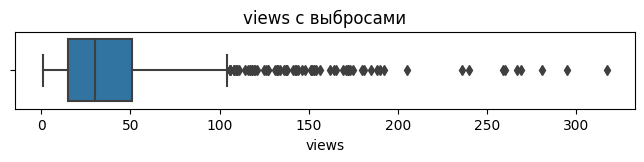

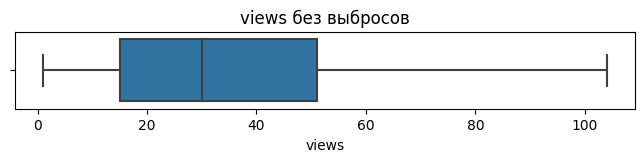

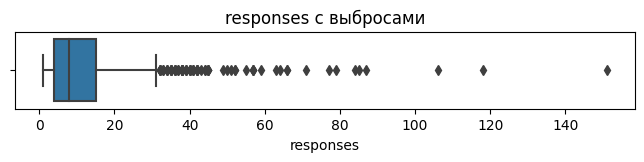

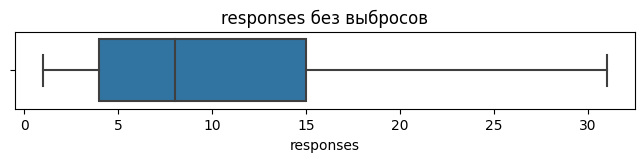

In [22]:
# строим диаграммы размаха с выбросами и без для столбцов views и responses с помощью цикла
for col in ['views', 'responses']:    
    plt.figure(figsize=(8,1))
    sns.boxplot(data=data, x=col)
    plt.title(f'{col} с выбросами')
    
    plt.figure(figsize=(8,1))
    sns.boxplot(data=data, x=col, showfliers=False)
    plt.title(f'{col} без выбросов')
    plt.show();

Видим достаточно большое количество выбросов.
В основном просмотры варьируются от 1 до 105, а отклики от 1 до 31.

In [23]:
# Создадим столбец с конверсией просмотров в отклики на вакансию
data['conversions'] = data['responses'] / data['views'] * 100

__Посмотрим, какие позиции представлены в вакансиях__

In [24]:
# Посмотрим уникальные значения в столбце position
print('Предлагаемые позиции в вакансиях:')
print()
print(data['position'].value_counts())

Предлагаемые позиции в вакансиях:

Project manager                                                                                          42
Интернет-маркетолог                                                                                      39
Аналитик данных                                                                                          35
Python-разработчик                                                                                       34
Фронтенд-разработчик                                                                                     32
UX/UI дизайнер                                                                                           31
Системный аналитик                                                                                       31
Менеджер проектов                                                                                        17
Frontend-разработчик                                                                                 

Есть повторения, записанные по разному. Чтобы избавиться от дубликатов, приведем все названия к нижнему регистру.

In [25]:
# Приводим все названия позиций к нижнему регистру, чтобы избавиться от дубликатов
data['position'] = data['position'].str.lower()

# Посмотрим уникальные значения в столбце position
print('Предлагаемые позиции в вакансиях:')
print()
print(data['position'].value_counts())

Предлагаемые позиции в вакансиях:

project manager                                                                                          55
интернет-маркетолог                                                                                      39
аналитик данных                                                                                          39
python-разработчик                                                                                       34
ux/ui дизайнер                                                                                           33
фронтенд-разработчик                                                                                     32
системный аналитик                                                                                       31
менеджер проектов                                                                                        17
frontend-разработчик                                                                                 

__Посмотрим, в каких городах представлены вакансии__

In [26]:
# Посмотрим уникальные значения в столбце city
print('Вакансии представлены в следующих городах:')
print()
print(data['city'].value_counts())

Вакансии представлены в следующих городах:

Москва                                                                                                                                                                                                                                                    870
Санкт-Петербург                                                                                                                                                                                                                                           137
Москва, Санкт-Петербург                                                                                                                                                                                                                                    30
Казань                                                                                                                                                                                            

Вакансии представлены как в городах РФ (Москва, Санкт-Петербург, Казань и т.д.), так и зарубежом (Будва, Алматы, Линкольн, Самуи и т.д.). И судя из того, что вакансия может быть представлена в нескольких городах, формат работы может быть разный, не только офисный.

__Изучим поля зарплат "от..." и "до..."__

In [27]:
# Посмотрим долю пропусков в полях salary_from и salary_to
print('Доля пропусков в колонке salary_from - '
      f'{data["salary_from"].isna().sum()/len(data):.1%}')
print('Доля пропусков в колонке salary_to - '
      f'{data["salary_to"].isna().sum()/len(data):.1%}')

Доля пропусков в колонке salary_from - 63.5%
Доля пропусков в колонке salary_to - 71.0%


Видим большую долю пропусков (больше половины) в этих полях. Это связано с тем, что заказчик не предоставил *"зарплатную вилку"*, либо данная вакансия не оплачивается, например по причине, что носит волонтерский характер работ.

In [28]:
# Смотрим нулевые значения в полях salary_from и salary_to
data.query('salary_from == 0' or 'salary_to == 0')

,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,mandatory_requirements,additional_requirements,selection_stages,conditions,period,conversions
16,295,Архив,Неизвестен,Не установлен,2023-01-12,2023-03-04,14,2,стажер smm проектов,0.00,0.00,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное","Стажировка, Проектная, Частичная",нет,"🔸базовые знания в составлении стратегии продвижения, анализе ЦА и конкурентов_x000D_\n🔸базовые знания в СММ_x000D_\n🔸грамотная устная и письменная речь_x000D_\n🔸 умение работать с гугл документами_x000D_\n🔸желание работать и обучаться_x000D_\n🔸любые другие знания будут плюсом",NaN,"Скрининг резюме, собеседование","Длительность стажировки: 6 недель, будьте готовы тратить не менее 2-4 ч/день._x000D_\n_x000D_\nПосле стажировки мы предоставляем сертификат о прохождении и лучших берем в платные проекты.",51,14.29
405,815,Архив,Повторная,менеджер 9,2023-05-03,2023-09-22,2,1,data engineer,0.00,0.00,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор","Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Полная,нет,"- Высшее образование _x000D_\n-Умение работать с Clickhouse, АirFlow, Postgres, Grafana, Prometheus._x000D_\n- Технический английский язык.",Опыт от 3-х лет со схожими функциями;,1.Скрининг резюме _x000D_\n2. Общение с рекрутером. _x000D_\n3. Технические собеседование._x000D_\n4. Встреча с руководителем.,- Гибрид или удаленка_x000D_\n- Оформление в штат_x000D_\n- Фулл-тайм _x000D_\n- Зарплата обсуждается с финалистами_x000D_\n- Работа с интересными задачами _x000D_\n- Ментор - руководитель _x000D_\nНо в технические нюансы нужно будет вникать самостоятельно,142,50.00
429,849,Архив,Входящая заявка,менеджер 1,2023-05-16,2023-10-23,72,4,web-дизайнер,0.00,NaN,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Гибрид,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Проектная,нет,"Навыки работы в ""блочных"" сайтах типа Тильда.",Опыт дизайна в Unisender или Sendpuls,Скрининг резюме и портфолио_x000D_\nИнтервью онлайн,Неоплачиваемая стажировка на период 1-2 месяца_x000D_\nОформляется договор между стажером и организацией.,160,5.56


Всего 3 строки с нулевыми зарплатами. Заменим значения 0 на NaN и посмотрим минимальные и максимальные значения зарплат в этих полях.

In [29]:
# Производим замену всех значений 0 в полях salary_from и salary_to на NaN
data['salary_from'] = data['salary_from'].replace(0, np.nan)
data['salary_to'] = data['salary_to'].replace(0, np.nan)

In [30]:
# Выводим минимальные и максимальные значения в полях salary_from и salary_to
print('Порог нижней границы зарплат от ' f'{data["salary_from"].min()}' ' до ' f'{data["salary_from"].max()}')
print('Порог верхней границы зарплат от ' f'{data["salary_to"].min()}' ' до ' f'{data["salary_to"].max()}')

Порог нижней границы зарплат от 500.0 до 150000.0
Порог верхней границы зарплат от 15.0 до 250000.0


Видим, что минимальные пороги нижней и верхней границ зарплат сильно занижены. Скорее всего они указаны в долларах, или имеют почасовую оплату, или и то и другое.

In [31]:
# делаем срез по полю salary_to меньше 5000
data.query('salary_to <= 5000')

,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,mandatory_requirements,additional_requirements,selection_stages,conditions,period,conversions
58,351,Архив,Сорсинг,Не установлен,2023-01-24,2023-02-02,32,8,it recruiter,NaN,600.00,Москва,"ИП, ГПХ, Самозанятость, Контракт, Трудовой договор",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное",Полная,нет,Знание IT рынка;_x000D_\nЗнание основных каналов и инструментов поиска кандидатов;_x000D_\nНавыки проведения интервью;_x000D_\nНацеленность на результат;_x000D_\nПонимание полного цикла рекрутингового процесса;_x000D_\nПонимание технических аспектов вакансий.,Желательно: от 6 месяцев опыта работы IТ Recruiter (можем обучить),"1. Скрининг резюме (важно аккуратное оформление и мотивация - пишите сопроводительное письмо с причинами, почему вам интересно здесь работать),_x000D_\n2. Заполнение анкеты с вопросами на логику_x000D_\n3. Интервью с рекрутером_x000D_\n4. Интервью с командой","График:_x000D_\nУ нас удаленная работа по графику (5/2) с 08:50 до 18:00 (GMT+3), из которого в работе 8 часов и плавающий перерыв 1 час и 10 минут, время фиксируется трекером._x000D_\n_x000D_\nЧто мы предлагаем:_x000D_\n_x000D_\n- Работу в стремительно развивающийся международной компании;_x000D_\n- Быстрая и понятная коммуникация: работаем в Slack и Jira_x000D_\n- Разнообразные задачи;_x000D_\n- Корпоративный английский с носителем языка;_x000D_\n- Своевременная выплата заработной платы.",9,25.00
170,499,Архив,Входящая заявка,менеджер 7,2023-03-06,2023-05-02,38,10,рекрутер-сорсер (с английским),"1,200.00","1,300.00",Москва,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах; без опыта","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,"- навыки сорсинга: boolean search, X-ray;_x000D_\n- знание английского языка на уровне не ниже B1-B2;_x000D_\n- дружелюбность, организованность, соблюдение сроков_x000D_\n- готовность работать part-time в часовом поясе UTC+2 - UTC+3",NaN,1. Скрининг резюме_x000D_\n2. Интервью с рекрутером_x000D_\n3. Возможно тестовое задание_x000D_\n4. Финальное интервью,"- оплата в USD или в рублях, как тебе удобно, через платежный сервис;_x000D_\n- удаленный формат работы, минимум бюрократии;_x000D_\n- здоровая атмосфера для плодотворной работы; _x000D_\n- оформление по договору подряда",57,26.32
755,1339,Архив,Входящая заявка,менеджер 5,2023-08-07,2023-09-18,6,3,middle product manager,"1,300.00","2,000.00",Москва,Контракт,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,"What we will be expecting from you:_x000D_\n— a deep interest in mobile applications and the IT industry in general; _x000D_\n— excellent communication skills;_x000D_\n— at least 1.5 years of work experience in the field of analytics or marketing;_x000D_\n— upper-Intermediate level of English (both spoken & written), ability to maintain conversational style;_x000D_\n— confident PC use. _x000D_\nhigh level of responsibility",It will be totally cool if you have:_x000D_\n— prior work experience in the IT sphere_x000D_\ntechnical education;_x000D_\n— experience in startup launch;_x000D_\n— understanding of the development process / SDLC.,1 этап: ассессмент (небольшие задачки на 30 мин) + vcv (видеоинтервью в формате вопрос/ответ)_x000D_\n2 этап: hr-интервью_x000D_\n3 этап: интервью с CEO_x000D_\n4 этап: ТЗ логические задачки,"What we offer:_x000D_\n— remote work, service agreement; _x000D_\n— 21 days of paid vacation/year; _x000D_\n— an opportunity to relocate to Cyprus following the successful completion of the probationary period (with all the necessary migration support); _x000D_\n— powerful and fast hardware, Apple devices.",42,50.00
981,1663,Закрыта нами,Входящая заявка,менеджер 3,2023-09-14,2023-10-26,295,39,"data ana

Исходя из города и условий вакансии действительно некоторые зарплаты представлены в долларах и даже почасовая. Проигнорируем эти значения, заменять и удалять не будем.

__Посмотрим, какие форматы оформления предлагает заказчик__

In [32]:
# Посмотрим уникальные значения в столбце format_registration
data['format_registration'].value_counts()

ИП, ГПХ, Самозанятость, Контракт, Трудовой договор    484
Трудовой договор                                      334
Самозанятость                                         132
Контракт                                               70
Самозанятость, ИП                                      58
Самозанятость, Контракт, ИП, ГПХ                       57
Самозанятость, Трудовой договор                        21
ГПХ                                                    20
Самозанятость, ИП, ГПХ                                 15
Самозанятость, ИП, Трудовой договор                    14
Трудовой договор, ГПХ                                  13
Самозанятость, ГПХ                                     12
Контракт, Трудовой договор                             11
Самозанятость, ИП, Контракт                             7
Контракт, Трудовой договор, ГПХ                         6
Контракт, ГПХ                                           6
Самозанятость, ИП, Трудовой договор, ГПХ                5
Самозанятость,

Представлено 5 видов оформления на работу к заказчику: *ИП, ГПХ, Самозанятость, Контракт, Трудовой договор*. 
<br>По большей части вакансии представлены с оформлением на выбор.

__Посмотрим, какой формат работы предлагают работодатели__

In [33]:
# Посмотрим уникальные значения в столбце work_format
data['work_format'].value_counts()

Удаленка                  652
Офис, Гибрид              218
Офис, Гибрид, Удаленка    133
Офис                      106
Гибрид, Удаленка           99
Гибрид                     65
Офис, Удаленка             11
Name: work_format, dtype: int64

Видим 3 формата работы: *Офис, Удаленка и Гибрид*. 
<br>Больше всего предложений связанных с удаленным форматом, либо гибридным.

__Посмотрим, какие требования в части опыта работы предъявляются к соискателю__

In [34]:
# Посмотрим уникальные значения в столбце experience
data['experience'].value_counts()

До 1 года опыта, возможен опыт в pet-проектах; без опыта    1180
До 1 года опыта, возможен опыт в pet-проектах                 76
Опыт от 1 года                                                26
Без опыта                                                      2
Name: experience, dtype: int64

Видим 4 варианта в части предъявляемых требований опыта работы:
- До 1 года опыта, возможен опыт в pet-проектах; без опыта.   
- До 1 года опыта, возможен опыт в pet-проектах.
- Опыт от 1 года.
- Без опыта.

Больше 90% вакансий предлогаются соискателям без опыта, либо с опытом работ до 1 года.

__Посмотрим на требования уровня образования к кандидатам в представленных вакансиях__

In [35]:
# Посмотрим уникальные значения в столбце education
data['education'].value_counts() 

Другое, На смежных специальностях, Профильное    1240
На смежных специальностях, Профильное              42
Профильное                                          2
Name: education, dtype: int64

Видим 3 варианта: *Другое, На смежных специальностях, Профильное*.
<br>Также, как и с требованиями к опыту работы, больше 90% работодателей не предъявляют жестких требований к обазованию кандидата. Рассматривают как с профильным, так и любым другим.

__Посмотрим, какую занятость предлагают работодатели в вакансиях.__

In [36]:
# Посмотрим уникальные значения в столбце employment
data['employment'].value_counts() 

Полная                                                    774
Волонтерство, Проектная, Частичная, Стажировка, Полная     97
Стажировка                                                 82
Проектная, Частичная                                       59
Частичная                                                  42
Проектная                                                  40
Проектная, Частичная, Полная                               37
Частичная, Полная                                          33
Стажировка, Проектная, Частичная                           18
Стажировка, Проектная                                      15
Стажировка, Полная                                         15
Проектная, Полная                                          15
Стажировка, Частичная                                      13
Стажировка, Волонтерство, Проектная, Частичная              9
Стажировка, Волонтерство, Частичная                         7
Стажировка, Волонтерство, Проектная                         7
Стажиров

Представлено 5 видов занятости: *Полная, Частичная, Проектная, Стажировка и Волонтерство*. Виды занятости в вакансиях представлены как отдельно, так и совмещающие в себе несколько видов. Но львиной доле работодателей требуются сотрудники исключительно на полный рабочий день.

__Посмотрим, во скольких вакансиях присутствует ссылка на тестовое__

In [37]:
# Посмотрим уникальные значения в столбце link_test
data['link_test'].value_counts() 

нет    1178
да      106
Name: link_test, dtype: int64

Меньше, чем в 10% вакансий есть ссылка на тестовое задание.

__Создадим резервную копию нашего датафрейма и удалим столбцы с большим количеством текста__

In [38]:
# Создадим резервную копию датафрема 
data_copy = data.copy(deep=True)

# Удалим ненужные столбцы
data.drop(
    ['mandatory_requirements', 'additional_requirements', 'selection_stages', 'conditions'], 
    axis= 1 , 
    inplace= True
) 

__Закончили предобработку.__
- Заменили названия столбцов на удобные нам.
- Поменяли тип данных в столбцах с датами.
- Проанализировали пропуски, заменили на удобные нам в некоторых столбцах.
- Создали столбец с периодом от публикации до закрытия вакансии в днях.
- Создали резервную копию датафрейма и удалили столбцы с большим количеством текста.

## Исследовательский анализ данных

### Общие статистические данные количества просмотров, откликов и период закрытия вакансии.

__Посмотрим на общие статистические данные количества просмотров, откликов и период закрытия вакансии.__

In [39]:
# Оставляем поля 'views', 'responses', 'conversions' и 'period' из таблицы
# и выведем статистические данные методом describe()
data[['views', 'responses', 'conversions', 'period']].describe().T

,count,mean,std,min,25%,50%,75%,max
views,"1,284.00",40.19,38.71,1.00,15.00,30.00,51.00,317.00
responses,"1,284.00",11.51,12.66,1.00,4.00,8.00,15.00,151.00
conversions,"1,284.00",33.75,20.46,1.11,18.41,30.06,46.15,100.00
period,"1,127.00",45.32,40.61,0.00,19.00,34.00,58.00,294.00


Минимальное количество просмотров и откликов равно 1, максимум просмотров было 317, а откликов - 151. При этом средние показатели просмотров и откликов составляют 40 и 11 соответственно.
<br>Конверсия просмотров в отклики варьируется от 1,11% до 100%, средняя 33,75%. Есть вакансии со 100% конверсией, у которых просмотр равнялся отклику.
<br>Период закрытия вакансии варьируется от 0 до 294, при этом средний промежуток закрытия 45 дней. 0 дней говорит нам о том, что были вакансии, которые закрывались/отклонялись день в день.

__Посмотрим на статистические данные с разбивкой по статусам.__

In [40]:
# Сделаем функцию построения графика столбчатой диаграммы
def barplot(df, col_1, col_2, tag_1, tag_2):
    df_1 = (
        df.pivot_table(index=col_1, values=col_2, aggfunc='count')
        .sort_values(by=col_2, ascending=False)
    )
    df_1.plot(kind = 'bar', grid=True, figsize=(8, 5))
    plt.title(f'Распределение количества {tag_1} по {tag_2}')
    plt.xlabel(f'{col_1}', fontsize = 8)
    plt.ylabel(f'Количество {tag_1}', fontsize = 8)
    plt.legend('', frameon=False)
    plt.xticks(rotation=20)
    return plt.show()

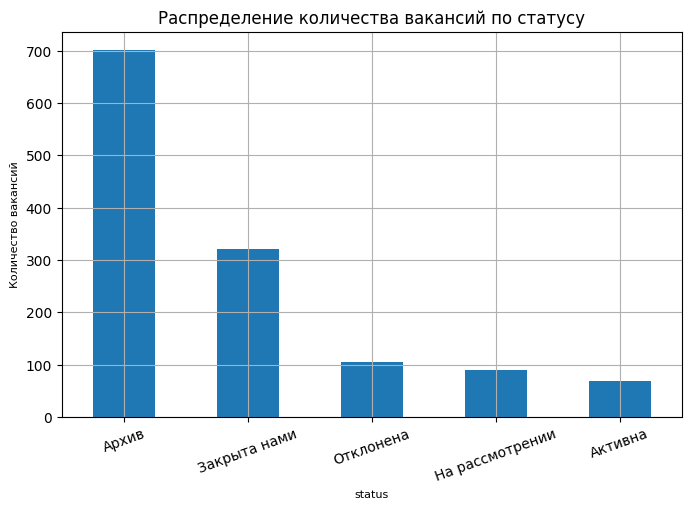

status             Активна  Архив Закрыта нами На рассмотрении Отклонена
views       min          2      1            2               8         2
            max        181    317          295             269        89
            mean     45.68  35.17        49.68           52.98     30.28
            median   24.00  25.00        40.50           35.00     26.00
responses   min          1      1            1               1         1
            max         57    151          106             118        31
            mean     10.94   9.38        15.26           18.03      9.14
            median       5      6           11              12         7
conversions min       3.82   1.11         1.20            3.45      1.27
            max     100.00 100.00       100.00           74.51     75.00
            mean     30.94  33.49        34.83           35.76     32.28
            median   26.45  28.71        31.64           36.29     30.00
period      min       <NA>      0            0              14         0
            max       <NA>    294          282              14       111
            mean      <NA>  49.22        40.32           14.00     34.85
            median    <NA>  38.00        29.00           14.00     27.00

In [41]:
# Применим функцию barplot
barplot(data, 'status', 'id', 'вакансий', 'статусу')

# Оставляем поля 'status', 'views', 'responses', 'conversions' и 'period' из таблицы, сгруппируем данные по статусу 
# и выведем минимальные, максимальные, средние и медианные значения по оставшимся полям таблицы 
data[['status', 'views', 'responses', 'conversions', 'period']].groupby('status').agg(['min', 'max','mean', 'median']).T

Львиная доля вакансий со статусом *Архив*, далее со статусом *Закрыта нами*. Их меньше в 2 с лишним раза, чем а *Архиве*.
<br>У вакансий со статусом *Закрыта нами*:
- количество просмотров варьируется от 2 до 295, в среднем 50;
- отклики - от 1 до 106, среднее количество откликов на вакансию 15;
- конверсия - от 1,2% до 100%, средняя 34,83%;
- период закрытия вакансии от 0 до 282 дней, среднее 40 дней.

Также видим, что есть закрытые вакансии в статусе *На рассмотрении*, чего не должно быть. Посмотрим сколько таких. 

In [108]:
# Сделаем срез по статусу 'На рассмотрении' и периоду больше либо равно 0
data.query('status == "На рассмотрении" and period >= 0', engine='python')

,id,status,lead_source,manager,publication_date,closing_date,views,responses,position,salary_from,salary_to,city,format_registration,work_format,experience,education,employment,link_test,period,conversions,publication_month,closing_month,work_moscow,work_abroad,copy_position,junior_position,specialization,specialization_development,salary,work_book_registration,remote_work_format,without_experience,full_time_employment


Только 1 строка с ошибочным статусом, удалим ее. Ошибка могла быть как техническая, так и человеческий фактор (не проставлен/забыли внести верный статус или ошибочно внесена информация о дате закрытия вакансии). Необходимо будет сообщить заказчику об этой проблеме. 

In [43]:
# Удаляем строку по индексу и сбрасываем индексы
data = data.drop(1133, axis=0).reset_index(drop=True)

Посмотрим, с каким статусом вакансии, у которых конверсия 100%.

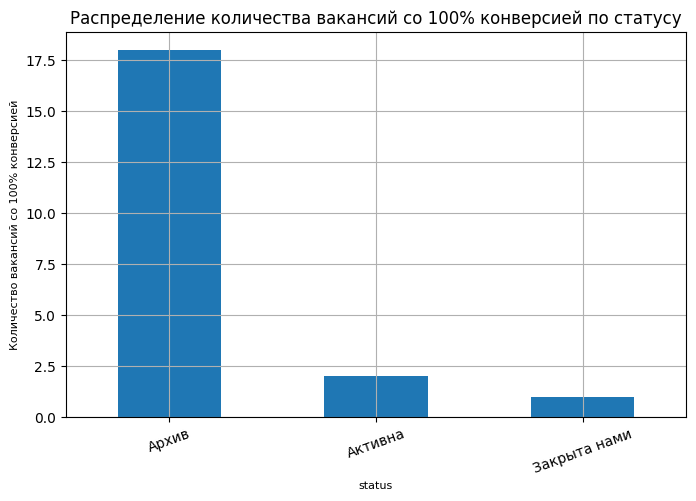

In [44]:
# Сделаем срез по конверсии равной 100 и сохраняем в новой переменной
conversions_100 = data.query('conversions == 100')

# Применим функцию barplot
barplot(conversions_100, 'status', 'id', 'вакансий со 100% конверсией', 'статусу')

Больше всего вакансий со 100% конверсией имеют статус *Архив*. Закрытых КА только 1 вакансия.

__Посмотрим на распределение данных по источнику лида.__

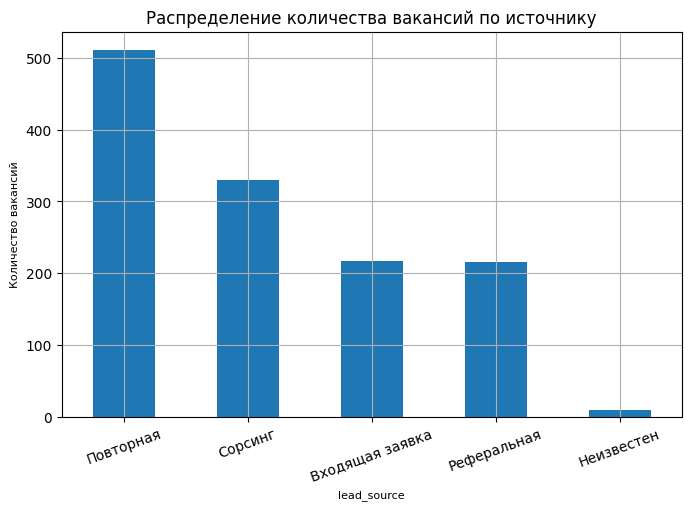

In [45]:
# Применим функцию barplot
barplot(data, 'lead_source', 'id', 'вакансий', 'источнику')

Больше всего вакансий из повторных обращений заказчиков.

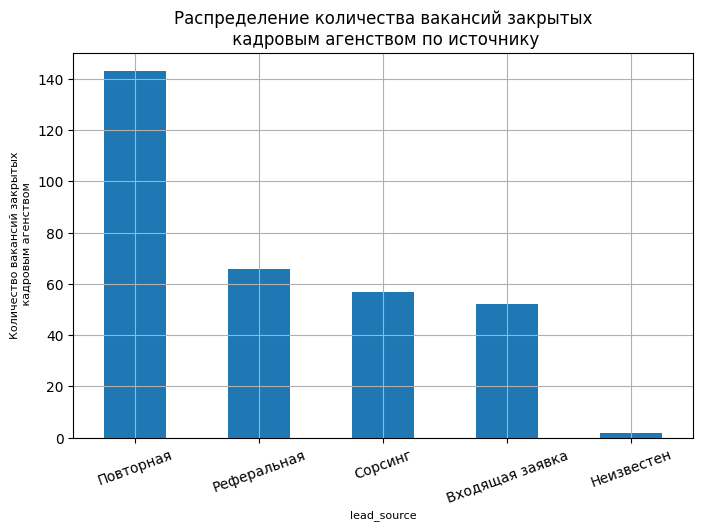

In [46]:
# Сделаем срез по статусу 'Закрыта нами' и применим функцию barplot
status_us = data.query('status == "Закрыта нами"')
barplot(status_us, 'lead_source', 'id', 'вакансий закрытых\n кадровым агенством', 'источнику')

От повторных источников в 2,5 раза успешней закрываются вакансии КА по сравнению с другими источниками.

Посмотрим, откуда приходили вакансии со 100% конверсией.

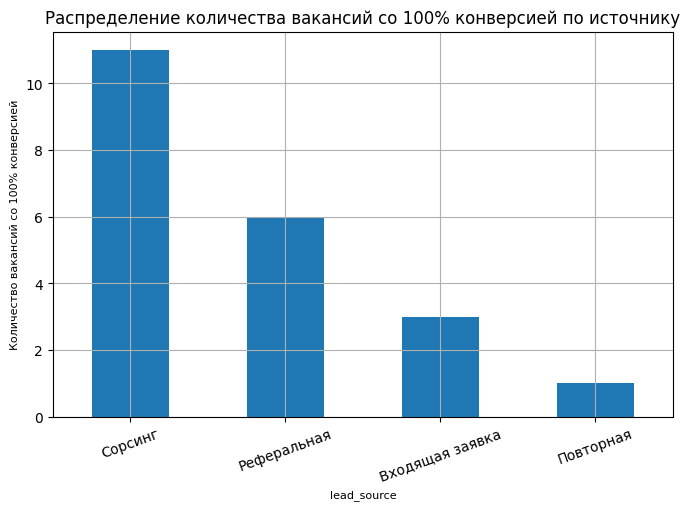

In [47]:
# Применим функцию barplot
barplot(conversions_100, 'lead_source', 'id', 'вакансий со 100% конверсией', 'источнику') 

Больше всего вакансий, которых привлекли менеджеры КА исходящим поиском.

__Посмотрим распределение количества вакансий по менеджерам в целом и по статусу "Закрыта нами".__

,manager,count_vacancies,count_closed,share
0,менеджер 2,38,15,39.47
1,менеджер 5,158,56,35.44
2,менеджер 3,65,20,30.77
3,менеджер 9,558,149,26.70
4,менеджер 1,227,54,23.79
5,менеджер 7,135,20,14.81
6,Не установлен,91,6,6.59
7,менеджер 4,1,0,0.00
8,менеджер 6,9,0,0.00
9,менеджер 8,1,0,0.00


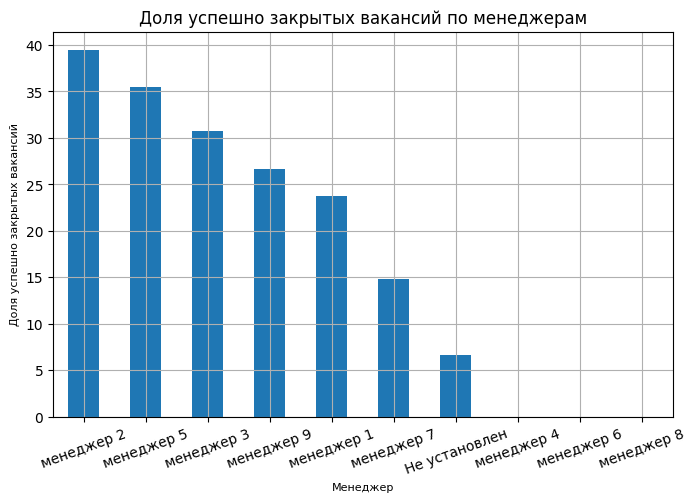

In [48]:
# Группируем 2 датасета по менеджерам и считаем количество вакансий 
# на каждого в целом и по статусу 'Закрыта нами'
managers = data.groupby('manager')['id'].agg('count').reset_index()
managers_status_us = status_us.groupby('manager')['id'].agg('count').reset_index()

# Объединяем полученные датасеты managers и managers_status_us по столбцу 'manager' методом merge() 
kpi_managers = managers.merge(managers_status_us, how='left', left_on='manager', right_on='manager')

# Переименовываем столбцы
kpi_managers.columns = ['manager', 'count_vacancies', 'count_closed']

# Заменим пропуски на 0 и приведем к типу данных 'int'
kpi_managers['count_closed'] = kpi_managers['count_closed'].fillna(0).astype('int')
    
# Считаем процент удачно закрытых вакансий каждым менеджером
kpi_managers['share'] = kpi_managers['count_closed']/kpi_managers['count_vacancies']*100

kpi_managers = kpi_managers.sort_values(by='share', ascending=False).reset_index(drop=True)

# Выведем на экран
display(kpi_managers)

# Построим график доли успешно закрытых вакансий по менеджерам
kpi_managers.plot(x = 'manager', y='share', kind = 'bar', grid=True, figsize=(8, 5))
plt.title('Доля успешно закрытых вакансий по менеджерам')
plt.xlabel('Менеджер', fontsize = 8)
plt.ylabel('Доля успешно закрытых вакансий', fontsize = 8)
plt.legend('', frameon=False)
plt.xticks(rotation=20)
plt.show()

По количеству распределенных вакансий на менеджера лидируют менеджеры 9 и 1 (558 и 277 вакансий соответственно). 
<br>Но доля по качеству успешно закрытых в интересах компании выше у менеджеров 2 и 5 (39,5% и 35,5%).

Посмотрим, у каких менеджеров больше всех было вакансий со 100% конверсией.

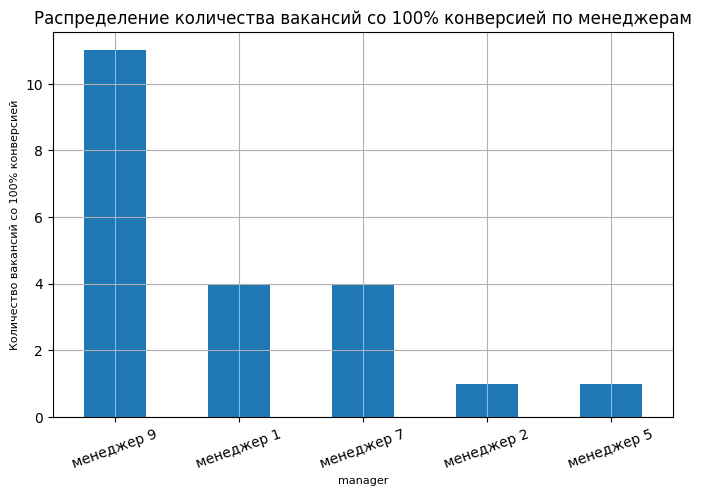

In [49]:
# Применим функцию barplot
barplot(conversions_100, 'manager', 'id', 'вакансий со 100% конверсией', 'менеджерам') 

Больше всех за менеджером 9, впринципе и понятно, за ним закреплено больше всех остальных вакансий.

### Матрица корреляций

Посмотрим на корреляцию признаков между собой. Чтобы увидеть более точную взаимосвязь будем использовать коэффициент корреляции Phi_K, т.к. у него есть ряд преимуществ:
- работает согласованно между категориальными, порядковыми и интервальными переменными;
- фиксирует нелинейную зависимость;
- возвращается к коэффициенту корреляции Пирсона в случае двунаправленного нормального входного распределения.

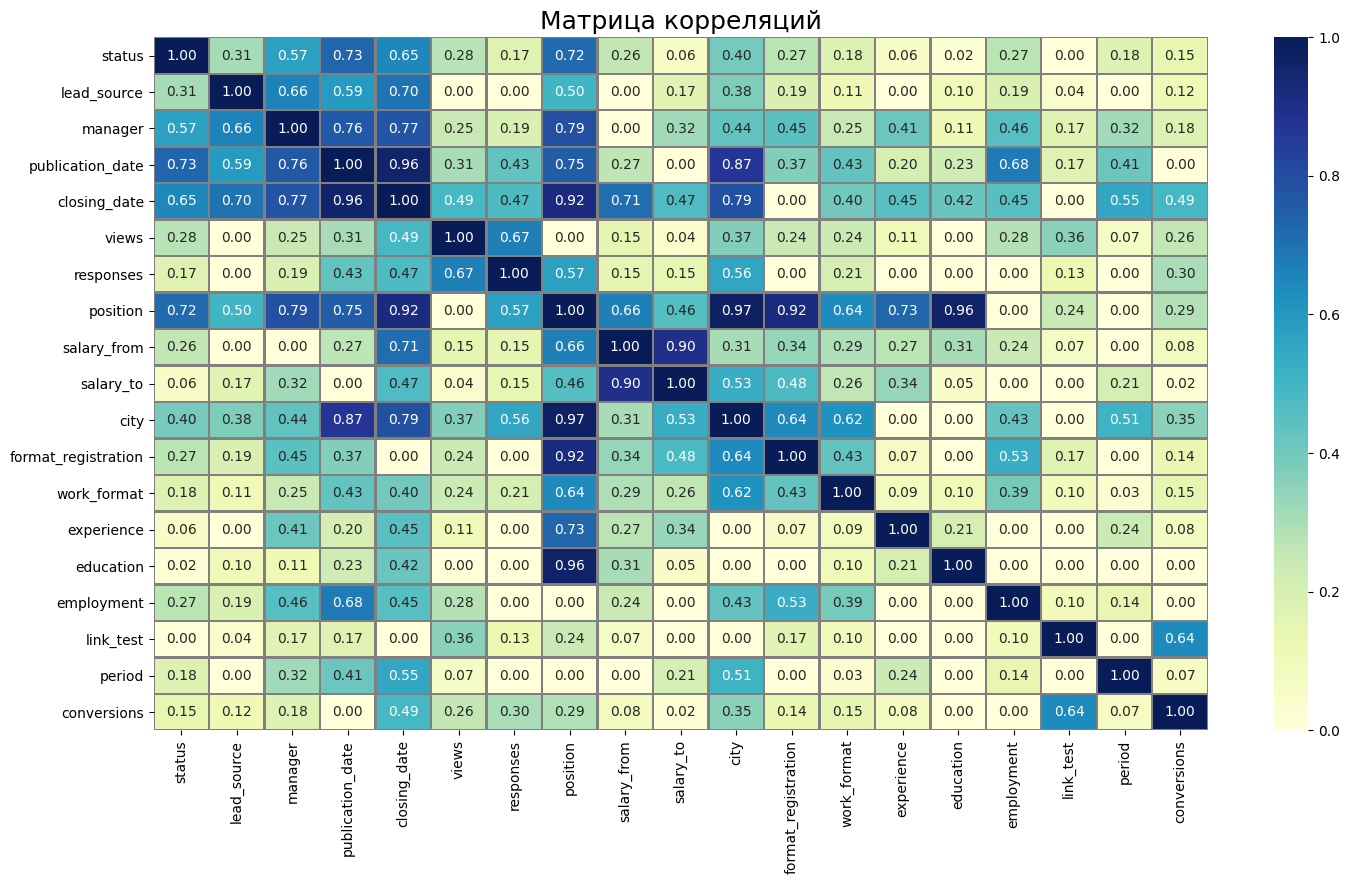

In [50]:
# Получаем матрицу корреляции phi_k между переменными
data_corr = data.drop(['id'], axis=1).phik_matrix(verbose=False)

# Строим тепловую карту матрицы корреляции phi_k
plt.figure(figsize=(17,9))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=1, linecolor='gray')
plt.title('Матрица корреляций', fontsize = 18)
plt.show();

In [51]:
# Создаем функцию вывода фигуры с двумя графиками отдельных столбцов мартицы корреляции на одной строке
def phik_heatmap(df):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle('Корреляции по просмотрам и откликам', fontsize=15)

    for i, col in enumerate(['views', 'responses']):
        sns.heatmap(
            df.corr()[[col]].drop(col).sort_values(by=col, ascending=False),
            annot=True, fmt='.2f', cmap='YlGnBu', 
            linewidths=1, linecolor='gray', ax=axs[i]
        )
        axs[i].set_title(f'Корреляция с {col}', fontsize=12)  

    plt.show()

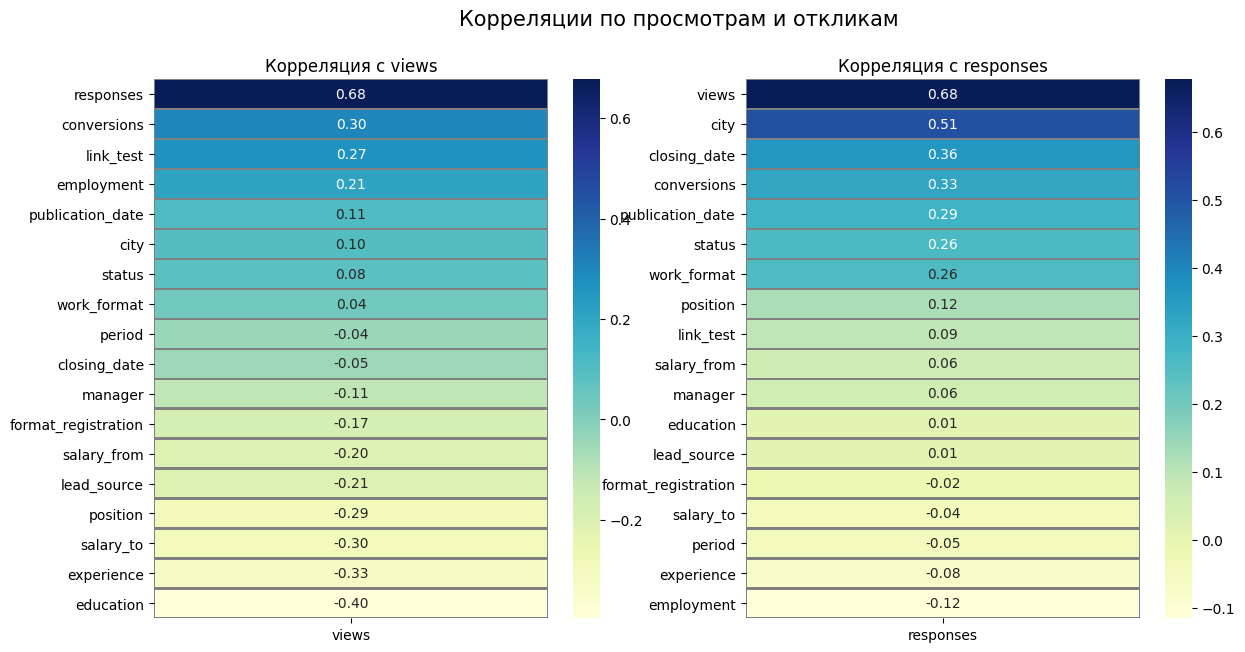

In [52]:
phik_heatmap(data_corr)

Для описания корреляции будем использовать следующую шкалу:
* если значение с **"+"** корреляция положительная, с **"-"** - отрицательная, 
* меньше 0,25 - отсутствует,
* 0,26 - 0,50 - слабая,
* 0,51 - 0,75 - средняя,
* больше 0,75 - сильная.

__Количество просмотров__ сильной корреляция не имеют ни с одним признаком. Слабо положительно коррелирует с признаком *Ссылка на тестовое* (0,30). То есть, если в вакансии есть ссылка на тестовое задание, то вероятнее всего оно будет просмотрено большим числом людей. Однако количество просмотров имеет слабую отрицательную корреляцию с *Позицией, Зарплатой до, Опытом работы и Образованием* (от -0,30 до -0,40). Это означает, что чем выше позиция, зарплата, опыт работы или уровень образования требуемые для вакансии, тем меньше вероятность того, что она будет просмотрена многими кандидатами. Возможно, более высокие требования отпугивают некоторых потенциальных соискателей.

__Количество откликов__ имеет среднюю положительную корреляцию с признаком *Город* (0,51), а слабую положительную корреляцию с *Датами публикации и закрытия*, *Статусом* и *Форматом работы* (от 0,27 до 0,37). Это может указывать на то, что указание города в вакансии может привлечь больше кандидатов, а также на то, что время публикации и закрытия вакансии, и формат работы могут влиять на количество откликов.

__Город__ имеет сильную корреляцию с *Позицией* (0,97) и _Датами публикации и закрытия_ (0,87 и 0,79 соответственно), а также среднюю с _Форматами оформления и работы_ и _Верхней границей зарплат_ (0,53 - 0,64). Все это говорит нам о том, что количество откликов как и просмотров не имеет сильной связи с другими признаками. Однако есть некоторая связь с позицией и городом, где размещена вакансия. Город имеет сильную связь с позицией вакансии и датами публикации и закрытия ее. Также есть некоторая связь с форматами оформления и работы, а также с верхней границей зарплаты.

### Сравнение количества просмотров и откликов по признакам

#### Сравним количество просмотров и откликов по месяцам публикации и закрытия

Нам необходимо создать поля с месяцами публикации и закрытия вакансий из полей дат публикации и закрытия вакансий соответственно.

In [53]:
# Создаем столбцы publication_month и closing_month с номерами месяцев 
# публикации и закрытия из столбцов publication_date и closing_date соответственно
data['publication_month'] = data['publication_date'].dt.month
data['closing_month'] = data['closing_date'].dt.month.astype('Int32')

In [54]:
# Создадим функцию группировки по исследуемому признаку
def groupby(df, column_1, column_2):
    
    # группируем по признаку 1 и считаем количество вакансий, общее количество и среднее по признаку 2
    df_1 = df.groupby(column_1)[column_2].agg(['count', 'sum', 'mean']).round().reset_index()
    
    # меняем тип данных на int
    df_1['mean'] = df_1['mean'].astype('int')
    
    # переименовываем столбцы
    df_1.columns = [column_1, 'count_vacancies', f'count_{column_2}', f'avg_{column_2}']
    
    return df_1

# Создадим функцию вывода графика количества просмотров и откликов по исследуемому признаку
def barh(df, column_1, column_2, column_3, text, tag=''):
    (
        df.pivot_table(index=column_1, values=[column_2, column_3])
        .plot(kind = 'barh', grid=True, figsize=(8, 5))
    )
    plt.title(f'{tag} количество просмотров и откликов по {text}', fontsize=12)
    plt.legend(labels=['отклики', 'просмотры'], fontsize=8)
    plt.xlabel(f'{tag} количество просмотров и откликов', fontsize=8)
    plt.ylabel('месяц', fontsize=8)
    
    return plt.show()

# Создадим функцию построения столбчатой диаграммы
def bar(df, column_1, column_2, text):
    df.plot(x = column_1, y = column_2, kind = 'bar', grid=True, figsize=(8, 5))
    plt.title(f'Распределение количества вакансий по {text}')
    plt.xlabel('Месяц', fontsize = 8)
    plt.ylabel('Количество вакансий', fontsize = 8)
    plt.legend('', frameon=False)
    plt.xticks(rotation=0)
    return plt.show()

Далее воспользуемся функциями к ряду признаков.

__Просмотры и отклики по месяцу публикации__

In [55]:
# Считаем среднее количество просмотров и откликов по всем вакансиям
mean_views = np.round(np.mean(data['views']), 0).astype('int')
mean_responsesм = np.round(np.mean(data['responses']), 0).astype('int')
# Выведем на экран
print(f'В среднем на вакансию приходится {mean_views} просмотров и {mean_responsesм} откликов.')

В среднем на вакансию приходится 40 просмотров и 11 откликов.


In [56]:
# применим функцию groupby к нашему датафрейму и к исследуемому признаку, 
# сохраним в новых переменных полученные датасеты
publication_views = groupby(data, 'publication_month', 'views')
publication_responses = groupby(data, 'publication_month', 'responses')

# Выведем на экран по 2 строки полученных датасетов
display(publication_views.head(2), publication_responses.head(2))

,publication_month,count_vacancies,count_views,avg_views
0,1,82,2463,30
1,2,66,2120,32


,publication_month,count_vacancies,count_responses,avg_responses
0,1,82,690,8
1,2,66,658,10


In [57]:
# Объединяем полученные датасеты publication_views и publication_responses 
# по двум столбцам 'publication_month' и 'count_vacancies' методом merge() 
publication_views_responses = (
    publication_views.merge(
        publication_responses, how='left', 
        left_on=['publication_month', 'count_vacancies'], 
        right_on=['publication_month', 'count_vacancies']
    )
)

# Считаем долю откликов по отношению к просмотрам за месяц
publication_views_responses['share'] = (
    publication_views_responses['count_responses']/publication_views_responses['count_views']*100
)

# Выведем на экран
publication_views_responses

,publication_month,count_vacancies,count_views,avg_views,count_responses,avg_responses,share
0,1,82,2463,30,690,8,28.01
1,2,66,2120,32,658,10,31.04
2,3,118,4524,38,1176,10,25.99
3,4,132,4971,38,1302,10,26.19
4,5,85,2940,35,919,11,31.26
5,6,133,4526,34,1174,9,25.94
6,7,126,4795,38,1377,11,28.72
7,8,181,7986,44,2166,12,27.12
8,9,101,5551,55,1452,14,26.16
9,10,104,4312,41,1561,15,36.20


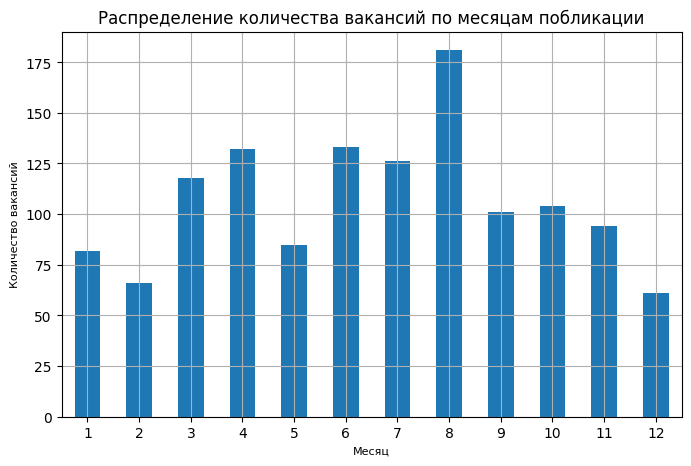

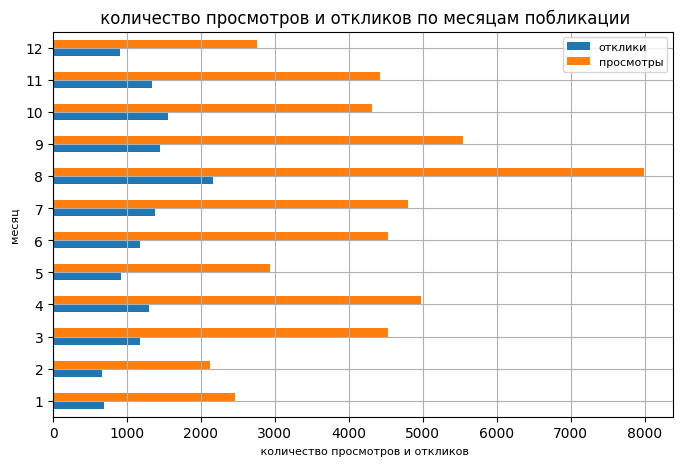

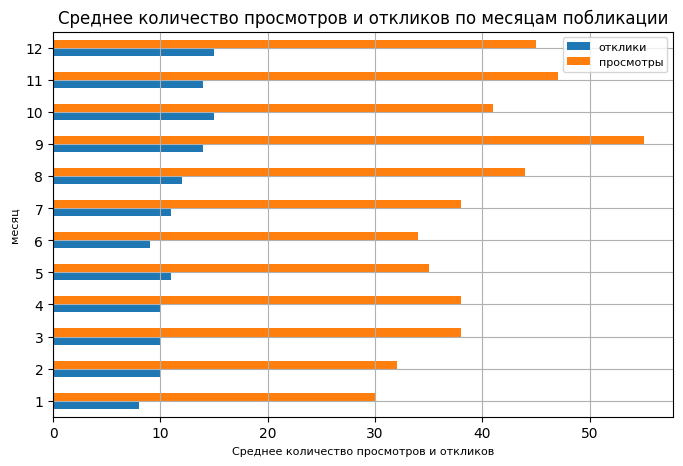

In [58]:
# применим функции bar и barh к полученному датасету и к исследуемому признаку, для вывода графиков на экран
bar(publication_views_responses, 'publication_month', 'count_vacancies', 'месяцам побликации')
barh(publication_views_responses,'publication_month', 'count_views', 'count_responses', 'месяцам побликации')
barh(publication_views_responses,'publication_month', 'avg_views', 'avg_responses', 'месяцам побликации', 'Cреднее')

Больше всего вакансий было размещено в августе (181), июне (133) и апреле (132), меньше всего в декабре и феврале (61 и 66).
<br>Самое большое количество просмотров совершили в августе (7986), сентябре (5551) и апреле (4971), меньше - в феврале и январе (2120 и 2463). По количеству откликов август тоже в лидерах (2166), далее октябрь и сентябрь (1561 и 1452), наименьшее количество февраль и январь (658 и 690). 
<br>При этом самая высокая конверсия оборачиваемости просмотров в отклики была в октябре (36,2%), а ниже всего в июне (25,94%).
<br>Также выяснили, что в среднем на вакансию приходится 40 просмотров и 11 откликов. Среднее количество просмотров и откликов выше общего среднего уровня с августа по декабрь (41-55 просмотров и 12-15 откликов). Самые высокие средние просмотры в сентябре (55), а самые низкие в январе (30), средние отклики выше в октябре и декабре (по 15), ниже в январе и июне (8 и 9).

__Просмотры и отклики по месяцу закрытия__

,closing_month,count_vacancies,count_views,avg_views,count_responses,avg_responses,share
0,1,8,369,46,108,14,29.27
1,2,38,1149,30,333,9,28.98
2,3,82,2236,27,730,9,32.65
3,4,62,1750,28,488,8,27.89
4,5,65,2351,36,633,10,26.92
5,6,143,5392,38,1321,9,24.50
6,7,110,3949,36,1198,11,30.34
7,8,149,5790,39,1413,9,24.40
8,9,138,5077,37,1671,12,32.91
9,10,150,6669,44,1803,12,27.04


------------------------------------------------------------------------------------


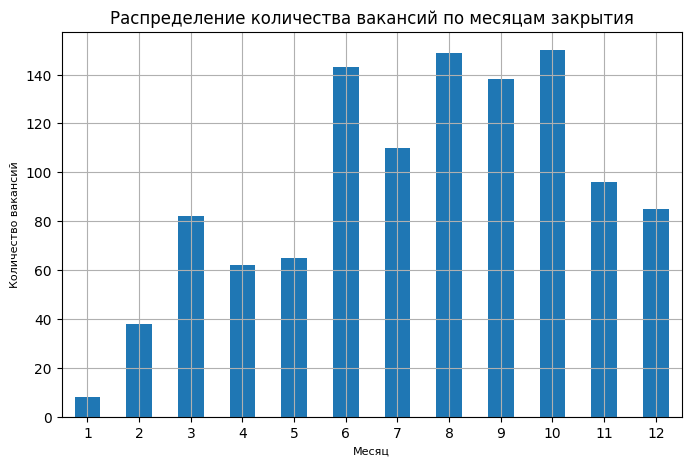

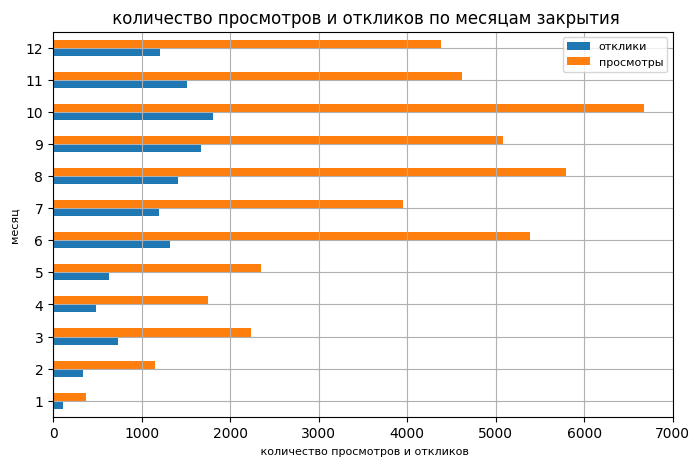

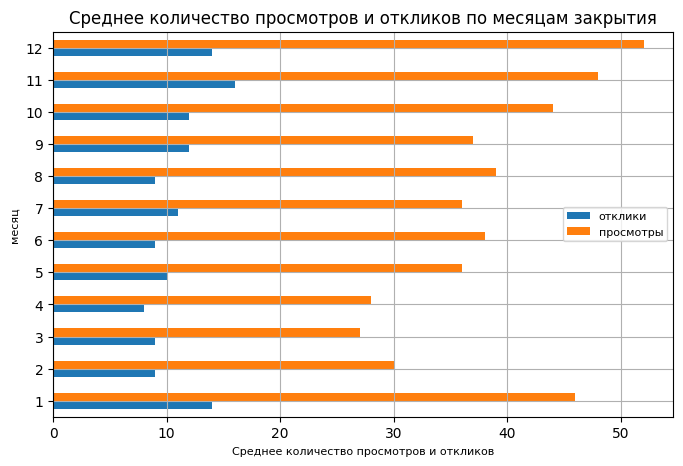

In [59]:
# применим функцию groupby к нашему датафрейму и к исследуемому признаку, 
# сохраним в новых переменных полученные датасеты
closing_views = groupby(data, 'closing_month', 'views')
closing_responses = groupby(data, 'closing_month', 'responses')

# Объединяем полученные датасеты closing_views и closing_responses 
# по двум столбцам 'publication_month' и 'count_vacancies' методом merge() 
closing_views_responses = (
    closing_views.merge(
        closing_responses, how='left', 
        left_on=['closing_month', 'count_vacancies'], 
        right_on=['closing_month', 'count_vacancies']
    )
)

# Считаем долю откликов по отношению к просмотрам за месяц
closing_views_responses['share'] = (
    closing_views_responses['count_responses']/closing_views_responses['count_views']*100
)

# Выведем на экран
display(closing_views_responses)
print('------------------------------------------------------------------------------------')

# Применим функции bar и barh к полученному датасету и к исследуемому признаку, для вывода графиков на экран
bar(closing_views_responses, 'closing_month', 'count_vacancies', 'месяцам закрытия')
barh(closing_views_responses,'closing_month', 'count_views', 'count_responses', 'месяцам закрытия')
barh(closing_views_responses,'closing_month', 'avg_views', 'avg_responses', 'месяцам закрытия', 'Cреднее')

Больше всего вакансий закрывалось с июня по октябрь (110-150). Лидеры - октябрь и август (150 и 149), аутсайдеры - январь и февраль (8 и 38).
<br>Самое большое количество просмотров совершили также в месяцы лидеры, октябре (6669) и августе (5790), меньше - в январе и феврале (369 и 1149).
<br>Средние количества просмотров превышают общий средний уровень с октября по декабрь и в январе (44-52). Самый высокий в декабре (52 просмотра в среднем), а самый низкий в марте (27 просмотров).
<br>При этом самая высокая конверсия оборачиваемости просмотров в отклики была в сентябре (32,91%), а ниже всего в августе (24,4%).
<br>Среднее количество просмотров и откликов выше общего среднего уровня с октября по декабрь и в январе (44-52), откликов - с сентября по декабрь и в январе (12-16). Самые высокие средние просмотры в декабре (55), а самые низкие в марте (27), средние отклики выше в ноябре (16), ниже в апреле (8).

#### Сравним количество просмотров и откликов по городам

In [60]:
# Отсортируем поле 'position' по алфавиту и выведем уникальные значения
sorted(data['city'].unique())

['Albuquerque',
 'Helsinki',
 'Lincoln',
 'Алматы',
 'Алматы, Yerevan, Тбилиси, Будва',
 'Алматы, Ангарск, Москва',
 'Алматы, Минск',
 'Алматы, Москва, Астана, Санкт-Петербург',
 'Алматы, Шымкент (Чимкент)',
 'Белгород',
 'Белград',
 'Бишкек',
 'Будва',
 'Будва, Москва',
 'Будва, Тбилиси, Yerevan',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Вологда',
 'Воронеж',
 'Гродно, Санкт-Петербург, Ростов-на-Дону, Казань, Могилев, Гомель',
 'Дубаи',
 'Екатеринбург',
 'Екатеринбург, Санкт-Петербург, Казань, Новосибирск, Челябинск, Саратов',
 'Ессентуки, Минеральные Воды, Ставрополь',
 'Казань',
 'Калининград',
 'Калининград, Екатеринбург, Таганрог, Тверь, Казань, Тбилиси, Оренбург, Воронеж, Ульяновск, Петрозаводск, Самара',
 'Киров',
 'Краснодар',
 'Красноярск',
 'Миасс, Челябинск',
 'Минск',
 'Минск, Гомель',
 'Минск, Москва',
 'Москва',
 'Москва, Воронеж',
 'Москва, Екатеринбург',
 'Москва, Екатеринбург, Владивосток, Саранск, Брянск',
 'Москва, Екатеринбург, Санкт-Петербург',
 'Москва, Екатер

Чаще встречается Москва. А также видим за несколько зарубежных городов.
Создадим 2 поля, в одном значения, указывающие на присутствие Москвы в вакансии, в другом, указывающие на зарубежный город.

In [61]:
# Создаем функцию поиска исходного значения в строке по условию, 
# если есть данное значения присваивать 1, если нет, то 0
def function(row, value):
    if value in row:
        val = 1
    else:
        val = 0
    return val

# Создаем функцию поиска зарубежных городов в строке по условию,
# если есть данное значения присваивать 1, если нет, то 0
def func_city(row):
    if (
        'Albuquerque' in row or 'Helsinki' in row or 'Lincoln' in row 
        or 'Алматы' in row or 'Yerevan' in row or 'Тбилиси' in row 
        or 'Будва' in row or 'Астана' in row or 'Шымкент' in row 
        or 'Чимкент' in row or 'Белград' in row or 'Бишкек' in row
        or 'Могилев' in row or 'Гомель' in row or 'Дубаи' in row 
        or 'Минск' in row or 'Ташкент' in row
    ): 
        val = 1 
    else:
        val = 0
    return val

In [62]:
# Создаем новый столбец 'work_moscow', 
# применив нашу function к столбцу 'city' с входным значением поиска "Москва"
data['work_moscow'] = data['city'].apply(lambda x: function(x, 'Москва'))

# Создаем новый столбец 'work_abroad' применив нашу функцию func_city к столбцу 'city'
data['work_abroad'] = data['city'].apply(func_city)

In [63]:
# Выведем последние 10 строк этих столбцов на экран
data[['city', 'work_moscow', 'work_abroad']].tail(10)

,city,work_moscow,work_abroad
1273,Москва,1,0
1274,Москва,1,0
1275,"Тула, Домодедово, Щербинка, Дзержинск, Железнодорожный, Химки, Москва, Балашиха, Видное, Зеленоград, Королев, Красногорск, Лобня, Долгопрудный, Подольск, Рыбинск, Владимир, Реутов, Одинцово, Щелково, Мытищи",1,0
1276,"Алматы, Yerevan, Тбилиси, Будва",0,1
1277,"Будва, Тбилиси, Yerevan",0,1
1278,Москва,1,0
1279,Москва,1,0
1280,Москва,1,0
1281,"Минск, Москва",1,1
1282,Москва,1,0


In [64]:
# Выведем процентное соотношение вакансий с Москвой ко всем остальным  
# и сотношение вакансий с зарубежными городами ко всем остальным
print('Соотношение вакансий с Москвой ко всем остальным:')
print(data['work_moscow'].value_counts(normalize=True))
print('-----------------------------------------')
print('Соотношение вакансий с зарубежными городами ко всем остальным:')
data['work_abroad'].value_counts(normalize=True)

Соотношение вакансий с Москвой ко всем остальным:
1   0.75
0   0.25
Name: work_moscow, dtype: float64
-----------------------------------------
Соотношение вакансий с зарубежными городами ко всем остальным:


0   0.96
1   0.04
Name: work_abroad, dtype: float64

75% вакансий из всех имеют одну из локаций Москва. И только 25% в других городах.
Только 4% вакансий из всех имеют зарубежную локацию, остальные 96% представлены в городах РФ.

In [65]:
# Создаем функцию вывода фигуры с двумя графиками на одной строке
def graf_barplot(df, column, text, tag_1, tag_2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Распределение среднего количества', fontsize=15)

    for i, col in enumerate(['views', 'responses']):
        sns.barplot(y=col, x=column, data=df, estimator=np.mean, ax=axs[i])
        axs[i].set_ylabel(f'Среднее количество {col}', fontsize=8)
        axs[i].set_xlabel('')
        axs[i].set_xticks([0, 1])
        axs[i].set_xticklabels([f'{tag_1}', f'{tag_2}'])
        axs[i].set_title(f'{col} {text}', fontsize=10)

    return plt.show()

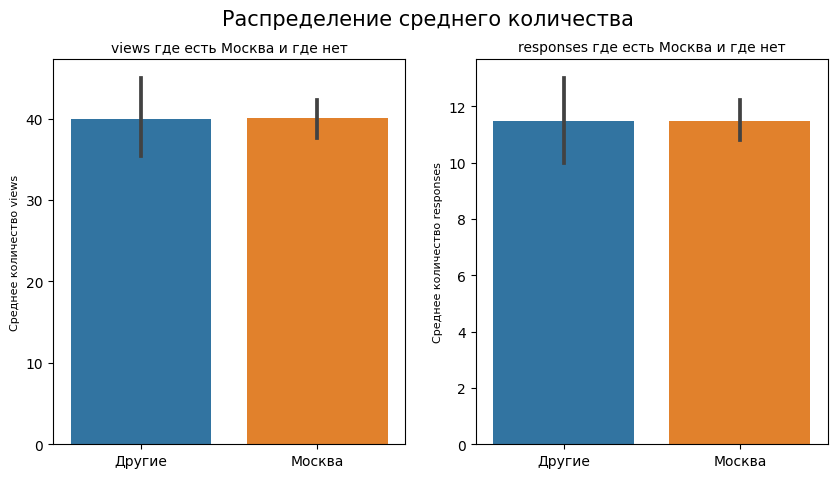

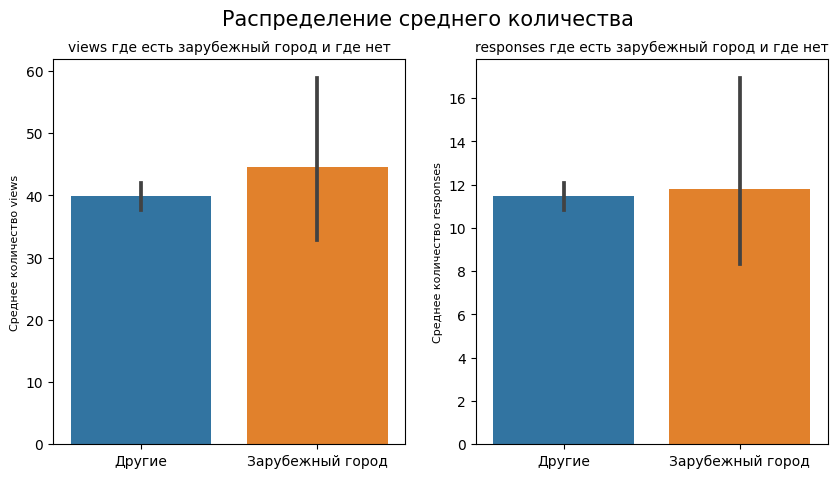

In [66]:
# Применим функцию graf_barplot
graf_barplot(data, 'work_moscow', 'где есть Москва и где нет', 'Другие', 'Москва')
graf_barplot(data, 'work_abroad', 'где есть зарубежный город и где нет', 'Другие', 'Зарубежный город')

Среднее количество просмотров и откликов вакансий в других городах и там, где присутствует Москва совпадают.
<br>А средние количества просмотров и откликов вакансий, где указаны зарубежные города выше, чем где не указаны.

#### Сравним количество просмотров и откликов по позициям

In [67]:
# Отсортируем поле 'position' по алфавиту и выведем уникальные значения
sorted(data['position'].unique())

['account менеджер в маркетинговое агентство',
 'ai-разработчик junior',
 'android/ ios developer',
 'angular junior developer',
 'aqa java trainee',
 'back-end разработчик (python)',
 'backend java разработчик',
 'backend разработчик',
 'backend разработчик (python)',
 'backend-разработчик',
 'backend-разработчик со знанием frontend',
 'bi analyst',
 'bi аналитик',
 'c++ разработчик',
 'crm-маркетолог',
 'crowd solutions architect',
 'cтажер-разработчик python (data engineer)',
 'data analyst',
 'data analyst в команду аналитики маркетинговых акций',
 'data analyst, data scientist',
 'data engineer',
 'data science/аналитик данных',
 'data scientist',
 'data scientist в отдел финансовой аналитики продаж.',
 'data scientist в проект',
 'devops engineer',
 'devops инженер',
 'devops инженер (linux)',
 'digital маркетолог',
 'digital-маркетолог',
 'digital-менеджер',
 'django разработчик',
 'e-commerce менеджер',
 'front-end разработчик / html-верстальщик',
 'front-end разработчик react/

Видим много вакансий для начинающих специалистов. Создадим столбец с указанием начальная это должность или нет.

In [68]:
# Создадим копию поля 'position' и заменим некоторые значения для удобства поиска
data['copy_position'] = data['position'].str.replace('ё', 'е')
data['copy_position'] = data['copy_position'].str.replace('-', ' ')
data['copy_position'] = data['copy_position'].str.replace('/', ' / ')

In [69]:
# Создаем функцию поиска исходного значения в строке по условию, 
# если есть данное значения присваивать 1, если нет, то 0
def func_position(row):
    if (
        'cтажер' in row or 'начинающая' in row or 'intern' in row 
        or 'стажировка' in row or 'junior' in row or 'джун' in row
        or 'младший' in row or 'начинающий' in row or 'помощник' in row
        or 'практикант' in row or 'ученик' in row
    ):
        val = 1
    else:
        val = 0
    return val

In [70]:
# Создаем новый столбец и применяем функцию к столбцу 'copy_position'
data['junior_position'] = data['copy_position'].apply(func_position)

In [71]:
# Выведем процентное сооношение вакансий для новичков по отношению ко всем остальным
data['junior_position'].value_counts(normalize=True)

0   0.77
1   0.23
Name: junior_position, dtype: float64

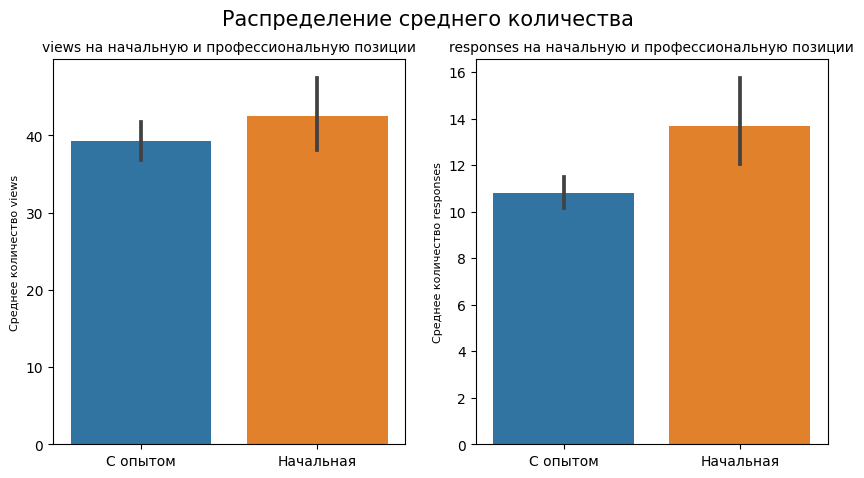

In [72]:
# Применим функцию graf_barplot
graf_barplot(data, 'junior_position', 'на начальную и профессиональную позиции', 'C опытом', 'Начальная')

23% вакансий составляют позиции для новичков.
<br>Среднее количество просмотров и откликов на начальные позиции выше, чем на позиции для кандидатов с опытом, а также выше общих средних значений. 

__Начальная / С опытом__:
- просмотры - 42/39 (общий средний 40);
- отклики - 14/11 (общий средний 11).

Создадим столбец с указанием области, в которой представлена вакансия.

In [73]:
# Создаем функцию поиска исходных значения в строке по условию и вывода соответствующей категории
def func_specialization(row):
    if (
        'developer' in row or 'разработчик' in row or 'engineer' in row 
        or 'инженер' in row or 'инженеров' in row or 'фронтендер' in row
    ):
        return 'разработка'
    elif (
        'analyst' in row or 'scientist' in row or 'аналитик' in row or 'аналитик' in row 
        or 'аналитиков' in row
    ):
        return 'аналитика'
    elif (
        'product manager' in row or 'project manager' in row or 'менеджер проекта' in row 
        or 'проектный менеджер' in row or 'менеджера проектов' in row or 'продакт менеджер' in row 
        or 'проджект' in row
    ):
        return 'менеджмент'
    elif (
        'маркетолог' in row or 'маркетинг' in row or 'таргетолог' in row 
        or 'pr' in row or 'таргетолога' in row or 'контекстолог' in row or 'таргетированной' in row 
        or 'маркетингу' in row or 'контекстной' in row or 'маркетолога' in row 
        or 'контекстолога' in row
    ):
        return 'маркетинг'
    elif (
        'рекрутер' in row or 'сорсер' in row or 'recruiter' in row or 'sourcer' in row 
        or 'персонала' in row or 'hr' in row or 'интервьюер' in row or 'ресечер' in row
    ):
        return 'отдел кадров'
    elif 'designer' in row or 'дизайнер' in row or 'верстальщик' in row:
        return 'дизайн'
    elif 'тестировщик' in row or 'тестированию' in row or 'тестирование' in row:
        return 'тестирование'
    elif 'поддержки' in row or 'тех.поддержки' in row or 'техподдержки' in row or 'тех поддержка' in row:
        return 'техническая поддержка'
    else:
        return 'другое'

In [74]:
# Создаем новый столбец и применяем функцию к столбцу 'copy_position'
data['specialization'] = data['copy_position'].apply(func_specialization)

In [75]:
# Выведем процентное сооношение вакансий по специализации
data['specialization'].value_counts(normalize=True)

разработка              0.32
аналитика               0.16
другое                  0.12
маркетинг               0.12
менеджмент              0.10
отдел кадров            0.07
дизайн                  0.06
тестирование            0.04
техническая поддержка   0.01
Name: specialization, dtype: float64

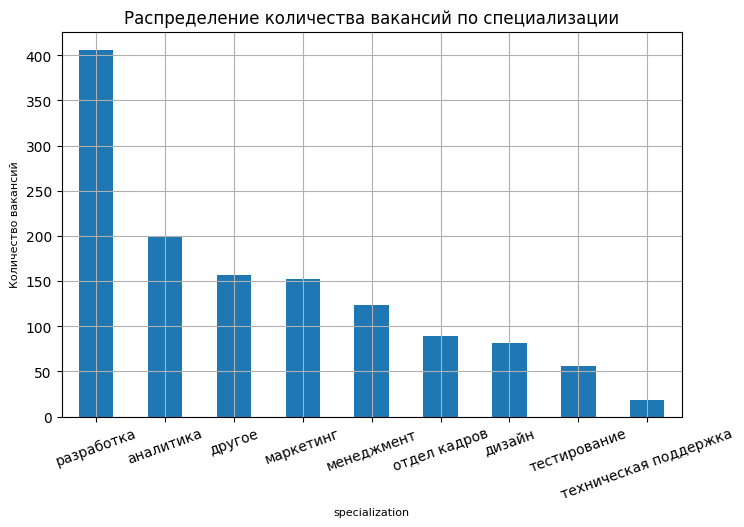

In [76]:
# Применим функцию barplot
barplot(data, 'specialization', 'id', 'вакансий', 'специализации')

Больше всего представлено вакансий в области разработки (32%).

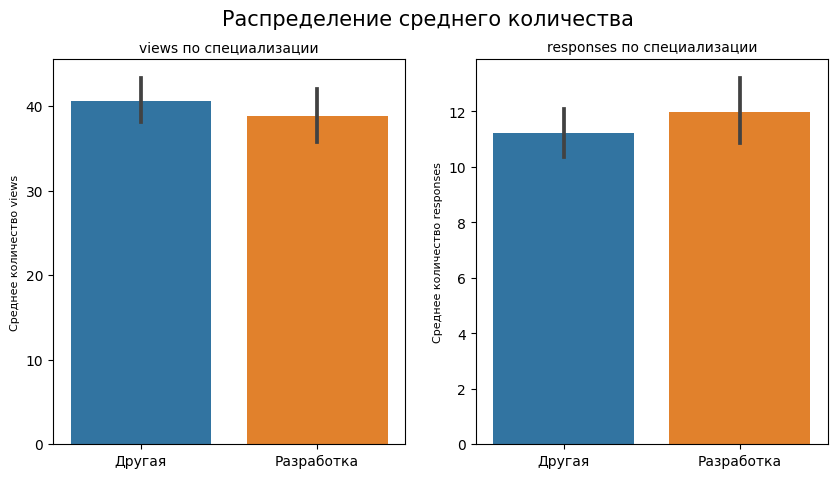

In [77]:
# Создаем новый столбец 'specialization_development', 
# применив нашу function к столбцу 'specialization' с входным значением поиска "разработка"
data['specialization_development'] = data['specialization'].apply(lambda x: function(x, 'разработка'))

# Применим функцию graf_barplot
graf_barplot(data, 'specialization_development', 'по специализации', 'Другая', 'Разработка')

Среднее количество просмотров вакансий в области разработки меньше, чем по другим специализациям. А вот откликов больше.
<br>Если сравнивать с общим средним, то среднее просмотров по разработке ниже общего среднего (39), а по откликам выше (12).
<br>А по вакансиям других специализаций средние просмотры и отклики на уровне с общими средними (40 и 11 соответственно).

#### Сравним количество просмотров и откликов по заработной плате

In [78]:
# Создаем функцию поиска пропусков в строке по условию, если значения пропущены в строке 
# в двух столбцах присваивать 0, если значение есть в обоих столбцах или хотя бы в одном, то 1
def func_salary(row):
    if np.isnan(row['salary_from']) and np.isnan(row['salary_to']):
        val = 0
    else:
        val = 1
    return val

In [79]:
# Создаем новый столбец и применяем функцию к датафрейму
data['salary'] = data.apply(func_salary, axis=1)

In [80]:
# Выведем процентное сооношение вакансий, где указана зарплата, к тем, где не указана
data['salary'].value_counts(normalize=True)

0   0.58
1   0.42
Name: salary, dtype: float64

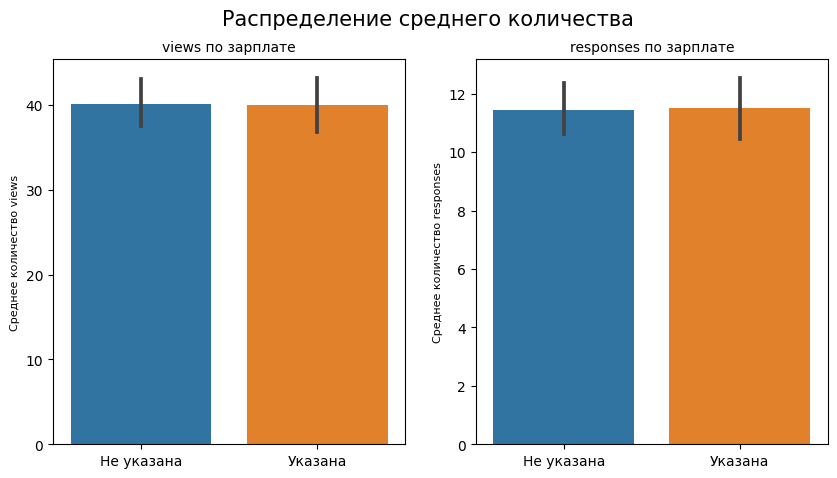

In [81]:
# Применим функцию graf_barplot
graf_barplot(data, 'salary', 'по зарплате', 'Не указана', 'Указана')

Зарпалата указана в 42% вакансий. Указание зарплаты в вакансиях не играет роли на среднее количество просмотров и откликов. Средние показатели совпадают.

#### Сравним количество просмотров и откликов по  формату оформления

1   0.70
0   0.30
Name: work_book_registration, dtype: float64

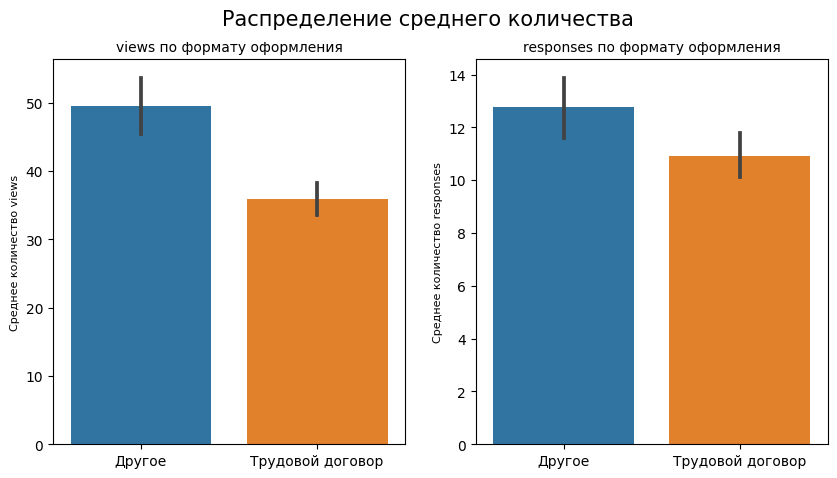

In [82]:
# Создаем новый столбец 'work_book_registration', 
# применив нашу function к столбцу 'format_registration' с входным значением поиска "Трудовой договор"
data['work_book_registration'] = data['format_registration'].apply(lambda x: function(x, 'Трудовой договор'))

# Выведем процентное сооношение вакансий, где оформление по Трудовому договору, к тем, где другое оформление
display(data['work_book_registration'].value_counts(normalize=True))

# Применим функцию graf_barplot
graf_barplot(data, 'work_book_registration', 'по формату оформления', 'Другое', 'Трудовой договор')

Вакансий, предлагающих оформление по Трудовому договору 70%. 
<br>Среднее количество просмотров и откликов меньше по вакансиям, где указано оформлетие по Трудовому.
<br>Если сравнивать с общим средним, то среднее просмотров по Трудовому ниже общего среднего (36), а по откликам на уровне (11).
<br>А по вакансиям, где любое другое указано оформление, средние просмотры и отклики выше общего среднего (50 и 13 соответственно).

#### Сравним количество просмотров и откликов по формату работы

1   0.70
0   0.30
Name: remote_work_format, dtype: float64

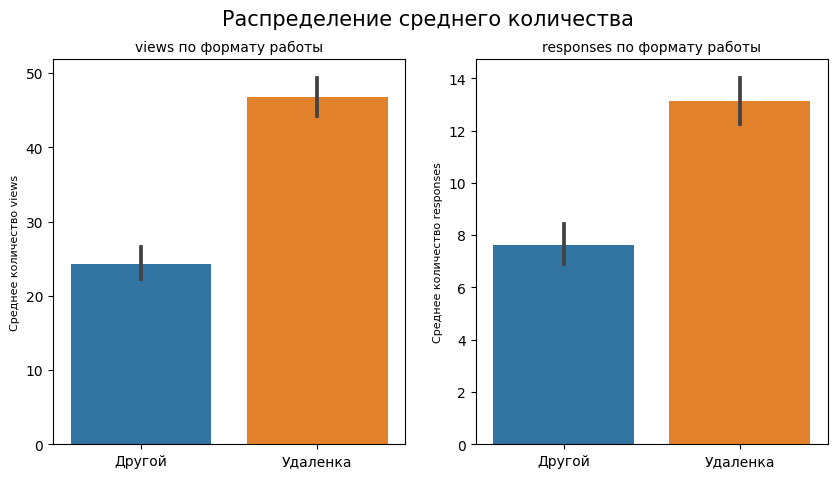

In [83]:
# Создаем новый столбец 'remote_work_format', 
# применив нашу function к столбцу 'work_format' с входным значением поиска "Удаленка"
data['remote_work_format'] = data['work_format'].apply(lambda x: function(x, 'Удаленка'))

# Выведем процентное сооношение вакансий, с указанием удаленной формы работы, к тем, где не указана
display(data['remote_work_format'].value_counts(normalize=True))

# Применим функцию graf_barplot
graf_barplot(data, 'remote_work_format', 'по формату работы', 'Другой', 'Удаленка')

Вакансий на удаленке представлено 70%. 
<br>Среднее количество просмотров и откликов по ним почти в 2 раза больше, чем по вакансиям с любым другим форматом работы.
<br>Если сравнить с общим средним просмотров и откликов при удаленном формате, то они выше (47/13), а при любом другом фрмате ниже (24/8).

#### Сравним количество просмотров и откликов по опыту

1   0.92
0   0.08
Name: without_experience, dtype: float64

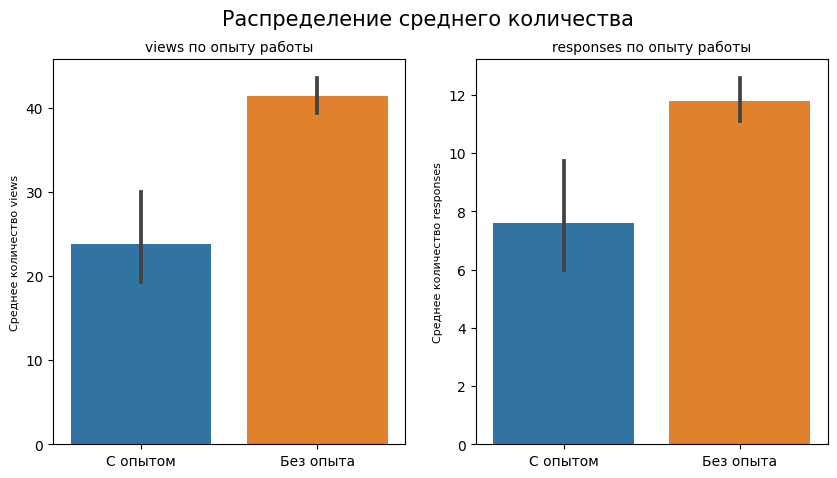

In [84]:
# Пртведем текст в столбце 'experience' к нижнему регистру
data['experience'] = data['experience'].str.lower()
    
# Создаем новый столбец 'without_experience', 
# применив нашу function к столбцу 'experience' с входным значением поиска "без опыта"
data['without_experience'] = data['experience'].apply(lambda x: function(x, 'без опыта'))

# Выведем процентное соотношение вакансий, где не предъявляются требования к опыту, к тем, где требуется
display(data['without_experience'].value_counts(normalize=True))

# Применим функцию graf_barplot
graf_barplot(data, 'without_experience', 'по опыту работы', 'С опытом', 'Без опыта')

Вакансий без опыта работы представлено 92%. 
<br>Среднее количество просмотров и откликов по ним больше, чем по вакансиям, требующим опыт работы.
<br>В сравнении с общим средним просмотров и откликов - без опыта на 1 выше уровня (41/12), с опытом на порядок ниже (24/8).

#### Сравним количество просмотров и откликов по занятости

1   0.77
0   0.23
Name: full_time_employment, dtype: float64

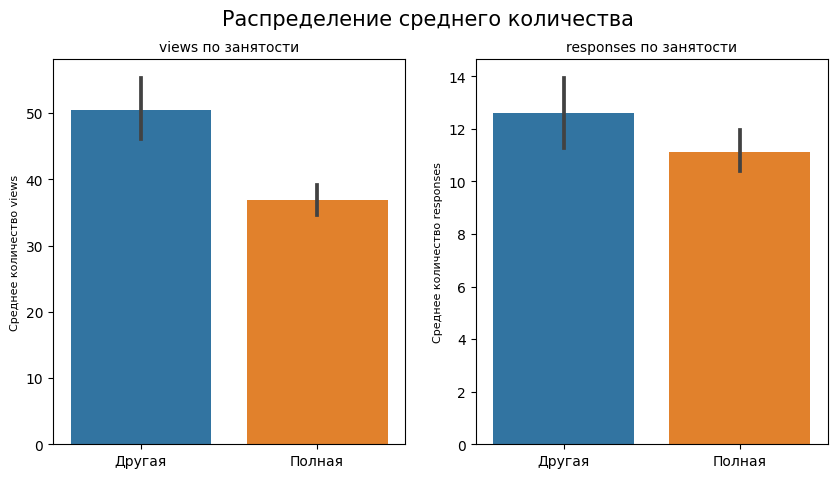

In [85]:
# Создаем новый столбец 'full_time_employment', 
# применив нашу function к столбцу 'employment' с входным значением поиска "Полная"
data['full_time_employment'] = data['employment'].apply(lambda x: function(x, 'Полная'))

# Выведем процентное соотношение вакансий, где указана полная занятость, ко всем остальным
display(data['full_time_employment'].value_counts(normalize=True))

# Применим функцию graf_barplot
graf_barplot(data, 'full_time_employment', 'по занятости', 'Другая', 'Полная')

Вакансий с указанием полной занятости представлено 77%. 
<br>Среднее количество просмотров и откликов по ним меньше, чем по вакансиям с другими занятостями.
<br>В сравнении с общим средним просмотров и откликов - при полной занятости уровень просмотров ниже, а откликов на уровне (37/11), по вакансиям с другими видами занятости уровень среднего выше (50/13).

__Вывод__

Мы провели предобработку данных и исследовательский анализ, по результатам которых можно выделить следующее:
- В таблице опубликовано 1284 вакансии, по которым совершено 51608 просмотров и 14782 отклика.
- По всем вакансиям совершен был произведен хотя бы 1 просмотр и отклик.
- В среднем на вакансию приходится 40 просмотров и 11 откликов.
- Конверсия просмотров в отклики варьируется средняя 33,75%. Есть вакансии со 100% конверсией, у которых просмотр равнялся отклику. Преобладает статус по ним *Архив*, которых в основном привлекли менеджеры КА исходящим поиском.
- Период закрытия/отклонения вакансии составляет в среднем 45 дней.
- Преобладают вакансии со статусом *Архив*. Вакансий со статусом *Закрыта нами* в 2 с лишним раза меньше.
- По источнику лида преобладают вакансии, поступившие *Повторно*. Они же в 2,5 раза успешней закрываются КА.
- По количеству распределенных вакансий лидируют менеджеры 9 и 1, по качеству успешно закрытых в интересах КА менеджеры 2 и 5.

После построения матрицы корреляций выяснили, что количество откликов как и просмотров не имеет сильной связи с другими признаками. Однако есть некоторая связь с позицией и городом, где размещена вакансия. Город имеет сильную связь с позицией вакансии и датами публикации и закрытия ее. Также есть некоторая связь с форматами оформления и работы, а также с верхней границей зарплаты.

Создали новые поля для формирования будущих гипотез в продолжении анализа, и на основании которых выяснили, что:
- Август является абсолютным лидером по публикации вакансий (181), просмотрам (7986) и откликам (2166) по ним. Наименьшее количество публикаций в декабре и феврале (61 и 66), а по просмотрам и откликам - февраль и январь (2120/658 и 2463/690).  
- По закрытию вакансий лидируют октябрь и август (150 и 149), аутсайдеры - январь и февраль (8 и 38).
- Разницы между средними количествами просмотров и откликов в вакансиях, где фигурирует Москва и где не указана, нет. Они равны.  В вакансиях, предлагающих одну из локаций зарубежом средние показатели выше, чем где указаны только города РФ.
- 23% вакансий составляют позиции для новичков, по которым средние количества просмотров и откликов выше (42/14), чем на позиции для кандидатов с опытом (39/11), а также выше общих средних значений.
- Больше всего размещается вакансий в области разработки (32%), которые в среднем просматривают меньше, чем откликаются, в сравнении с другими областями, где средние просмотры и отклики равны общим средним на вакансию.
- Информация о зарпалате есть в 42% вакансий, указание которой не играет роли на среднее количество просмотров и откликов, они совпадают.
- Вакансий, предлагающих один из вариантов оформления *Трудовой договор* 70%. Средние показатели просмотров и откликов по ним ниже в сравнении с вакансиями, где данное оформление не фигурирует.
- Вакансий с удаленным форматом работы 70%. Просматривают и откликаются по ним в 2 раза чаще.
- Вакансий без опыта работы представлено 92%. Просмотров и откликов по ним в 2 раза больше, чем у вакансий, требующих опыт работы.
- Вакансии с указанием полной занятости просматриваюи реже, откликаются на уровне общего среднего показателя.

Бонусом, обнаружили 1 закрытую вакансию с ошибочным статусом *На рассмотрении*. Ошибка могла быть как техническая, так и человеческий фактор (не проставлен/забыли внести верный статус или ошибочно внесена информация о дате закрытия вакансии). Необходимо будет сообщить заказчику об этой проблеме.

## Выдвижение гипотез и их опровержение / проверка

### Гипотеза № 1. Вакансии в области разработки пользуются большим спросом, чем из других областей.

Ранее мы уже установили, что вакансий в области разработки представлено больше всего. Проверим, на сколько предложение отвечает спросу. Чтобы провести проверку данной гипотезы, посчитаем медианные значения количества просмотров и откликов для каждой области специализации и построим графики. Считаем медианные значения по причине большей устойчивости к выбросам и аномалиям.

In [86]:
# группируем по 'specialization' и считаем медиану по простотрам и откликам, сохраняем в новые переменных
spec_views = (
    data.pivot_table(index='specialization', values='views', aggfunc='median')
    .sort_values(by='views', ascending=False)
    .reset_index()
)
spec_responses = (
    data.pivot_table(index='specialization', values='responses', aggfunc='median')
    .sort_values(by='responses', ascending=False)
    .reset_index()
)   

# Запишем уникальные значения в новую переменную
unique_names = spec_views['specialization'].unique()

# Создаем палитру цветов, для каждого уникального имени задаем свой цвет
colours = sns.color_palette("tab20", n_colors=len(unique_names))

# Создаем словарь из уникальных значений и цветов путем объединения двух списков в кортежи
colours_dict = dict(zip(unique_names, colours))

In [87]:
# Создадим функцию вывода графика по исследуемым признакам
def func_graf_specialization(df, column_1, column_2, tag, text):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.barplot(y=column_1, x=column_2, data=df, palette=colours_dict)
    plt.xlabel(f'Количество {tag}', fontsize=8)
    plt.ylabel(f'{column_1}', fontsize=8)
    plt.title(f'Медианное количество {tag} по {text}', fontsize=12)
    return plt.show()

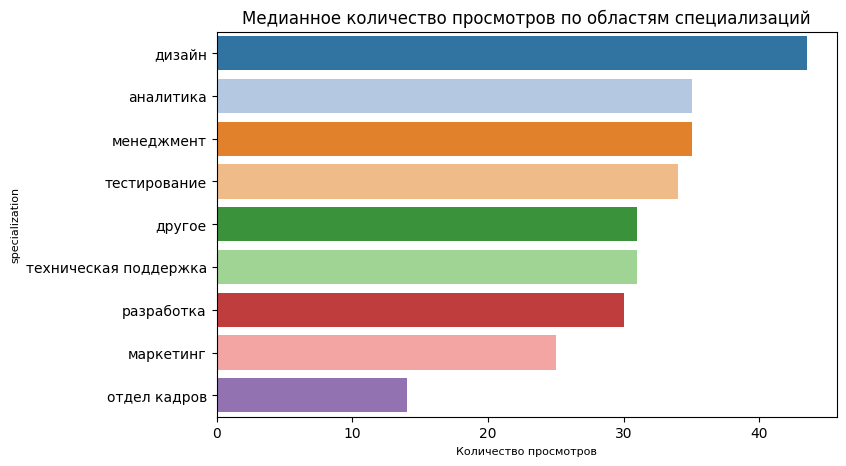

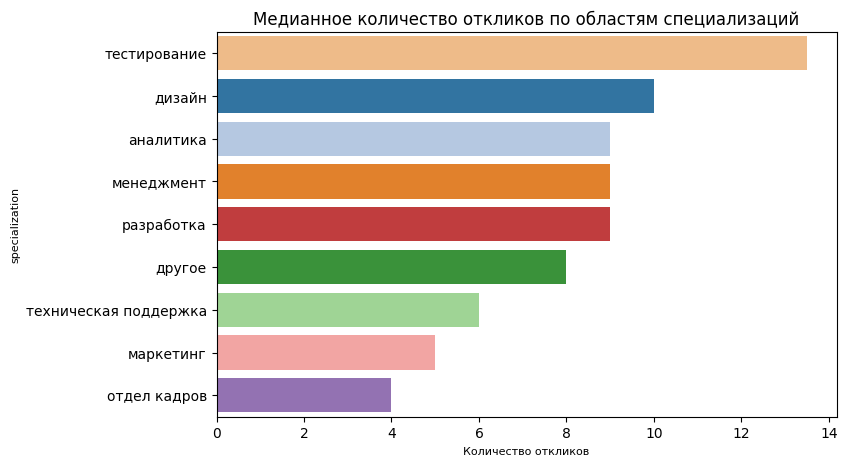

In [88]:
# Применяем функцию func_graf_specialization
func_graf_specialization(spec_views, 'specialization', 'views', 'просмотров', 'областям специализаций')
func_graf_specialization(spec_responses, 'specialization', 'responses', 'откликов', 'областям специализаций')

Наша гипотеза не подтвердилась. Лидером по просмотрам являются вакансии в области дизайна (по откликам 2-е место), а по откликам в области тестирования (по просмотрам 3-е). Разработка занимает лишь 7-ю строчку в количестве просмотров на вакансию, по откликам 3-ю, которую делит вместе с аналитикой и менеджментом, занимающие 2-ю строчку по просмотрам. Аутсайдерами по просмотрам и откликам являются вакансии в области маркетинга и отдела кадров.

### Гипотеза № 2 о различии среднего количества просмотров у вакансий, представленных в Москве и вакансий в других городах.

__Сформулируем нулевую и альтернативную гипотезы:__  

*Нулевая*: средние количества просмотров вакансий, представленных в Москве и вакансий в других городах равны.

*Альтернативная*: существуют различия между средними количествами просмотров вакансий, представленных в Москве и вакансиями в других городах.

In [89]:
# назначим новые переменные и сделаем соответствующие вакантские выборки по анализируемым группам
work_moscow = data.query('work_moscow == 1')['views']
not_work_moscow = data.query('work_moscow == 0')['views']

# выведем количество вакансий в выборках, средние количества просмотров и разницу средних на экран
print('Количество вакансий, представленных в Москве:', len(work_moscow))
print('Количество вакансий в других городах:', len(not_work_moscow))
print('Среднее количество просмотров в вакансиях, представленных в Москве:', work_moscow.mean())
print('Среднее количество просмотров в вакансиях в других городах:', not_work_moscow.mean())
print(f'Разница средних количеств просмотров: {work_moscow.mean() / not_work_moscow.mean()-1:.0%}')

Количество вакансий, представленных в Москве: 963
Количество вакансий в других городах: 320
Среднее количество просмотров в вакансиях, представленных в Москве: 40.0539979231568
Среднее количество просмотров в вакансиях в других городах: 40.0
Разница средних количеств просмотров: 0%


Посмотрим на распределения и выбросы.

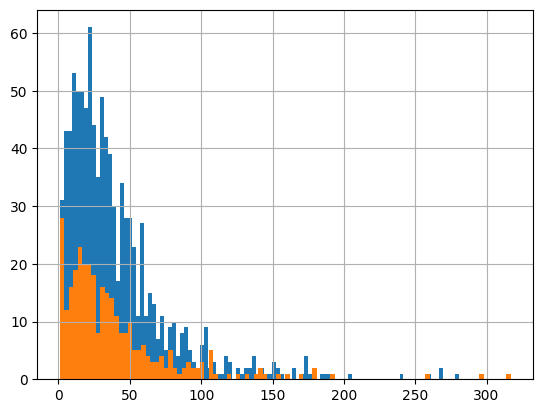

In [90]:
# Строим гистограммы для наших выборок
work_moscow.hist(bins = 100)
not_work_moscow.hist(bins = 100);

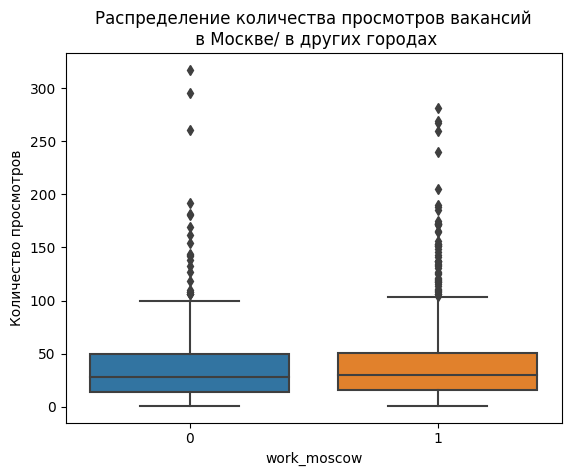

In [91]:
# Строим "ящик с усами"
sns.boxplot(y = 'views', data= data.query('work_moscow in [0,1]'), x ='work_moscow').set(
            title="Распределение количества просмотров вакансий\n в Москве/ в других городах", 
            ylabel="Количество просмотров");

На графиках видим положительное распределение и достаточно большое количество выбросов в обоих выборках, которые влияют на среднее значение.
<br>Если распределения в выборках не нормальны, то для проведения статистического теста можно использовать непараметрические тесты. Непараметрические тесты не требуют предположений о распределении данных и могут быть более устойчивыми к отклонениям от нормальности.
<br>Для сравнения двух выборок будем использовать непараметрический тест Манна-Уитни (или U-тест). Этот тест позволяет определить, есть ли статистически значимые различия между двумя независимыми группами.

In [92]:
# Создадим функцию для проведения статистического теста Манна-Уитни (U-тест)
def U_test(sample_1, sample_2):
    
    alpha = 0.05 # назначаем уровень статистической значимости
    
    statistic, p_value = mannwhitneyu(sample_1, sample_2) # вызываем метод для проверки гипотезы
    
    print(round(p_value, 3)) # выведем значение p-value на экран

    if p_value < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [93]:
# Применим функцию U_test к нашим выборкам
U_test(work_moscow, not_work_moscow)

0.207
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу: средние количества просмотров вакансий, представленных в Москве и вакансий в других городах равны. В данном случае, так как *p-value* (равный 0,207) больше уровня статистической значимости *alpha* (0,05), то результат не является статистически значимым.

### Гипотеза № 3 о различии среднего количества откликов у вакансий с указанием заработной платы и без указания

__Сформулируем нулевую и альтернативную гипотезы:__  

*Нулевая*: средние количества откликов у вакансий с указанием заработной платы и без указания равны.

*Альтернативная*: существуют различия между средними количествами откликов у вакансий с указанием заработной платы и без указания.

In [94]:
# назначим новые переменные и сделаем соответствующие вакантские выборки по анализируемым группам
salary = data.query('salary == 1')['responses']
not_salary = data.query('salary == 0')['responses']

# выведем количество вакансий в выборках, средние количества просмотров и разницу средних на экран
print('Количество вакансий с указанием зарплаты:', len(salary))
print('Количество вакансий без указания зарплаты:', len(not_salary))
print('Среднее количество откликов в вакансиях с указанием зарплаты:', salary.mean())
print('Среднее количество откликов в вакансиях без указания зарплаты:', not_salary.mean())
print(f'Разница средних количеств откликов: {salary.mean() / not_salary.mean()-1:.0%}')

Количество вакансий с указанием зарплаты: 535
Количество вакансий без указания зарплаты: 748
Среднее количество откликов в вакансиях с указанием зарплаты: 11.500934579439253
Среднее количество откликов в вакансиях без указания зарплаты: 11.447860962566844
Разница средних количеств откликов: 0%


Посмотрим на распределения и выбросы.

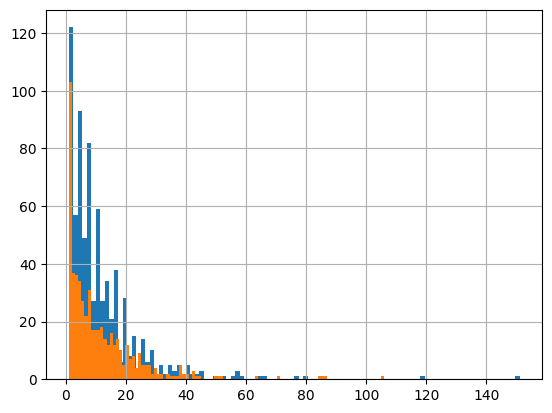

In [95]:
# Строим гистограммы для наших выборок
not_salary.hist(bins = 100)
salary.hist(bins = 100);

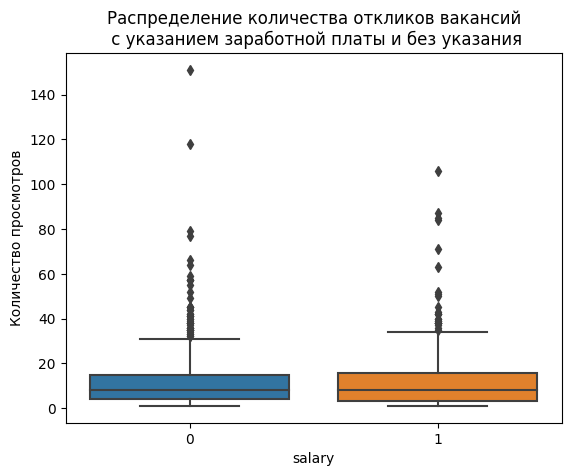

In [96]:
# Строим "ящик с усами"
sns.boxplot(y = 'responses', data= data.query('salary in [0,1]'), x ='salary').set(
            title="Распределение количества откликов вакансий\n с указанием заработной платы и без указания", 
            ylabel="Количество просмотров");

На графиках видим положительное распределение и достаточно большое количество выбросов в обоих выборках, которые влияют на среднее значение. Для сравнения двух выборок будем использовать непараметрический тест Манна-Уитни (или U-тест).

In [97]:
# Применим функцию U_test к нашим выборкам
U_test(salary, not_salary)

0.762
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу: средние количества откликов у вакансий с указанием заработной платы и без указания равны. В данном случае, так как *p-value* (равный 0,762) больше уровня статистической значимости *alpha* (0,05), то результат не является статистически значимым.

### Гипотеза № 4 о различии среднего количества просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие

Как правило январь, май, июнь, июль и август это месяцы, которые выпадают из жизни людей в плане работы и тем более ее поиска, т.к. в январе и мае достаточно много выходных и празничных дней, а в летние месяцы чаще отдыхают или ходят в отпуска. Проверим на гипотизе.

__Сформулируем нулевую и альтернативную гипотезы:__  

*Нулевая*: средние количества просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие равны.

*Альтернативная*: существуют различия между средними количествами просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие.

In [98]:
# назначим новые переменные и сделаем соответствующие вакантские выборки по анализируемым группам
working_months = data.query('publication_month not in [1,5,6,7,8]')['views']
not_working_months = data.query('publication_month in [1,5,6,7,8]')['views']

# выведем количество вакансий в выборках, средние количества просмотров и разницу средних на экран
print('Количество вакансий, опубликованных в рабочие месяцы:', len(working_months))
print('Количество вакансий, опубликованных в не рабочие месяцы:', len(not_working_months))
print('Среднее количество просмотров вакансий, опубликованных в рабочие месяцы:', working_months.mean())
print('Среднее количество просмотров вакансий, опубликованных в не рабочие месяцы:', not_working_months.mean())
print(f'Разница средних количеств откликов: {working_months.mean() / not_working_months.mean()-1:.0%}')

Количество вакансий, опубликованных в рабочие месяцы: 676
Количество вакансий, опубликованных в не рабочие месяцы: 607
Среднее количество просмотров вакансий, опубликованных в рабочие месяцы: 42.39940828402367
Среднее количество просмотров вакансий, опубликованных в не рабочие месяцы: 37.41350906095552
Разница средних количеств откликов: 13%


Посмотрим на распределения.

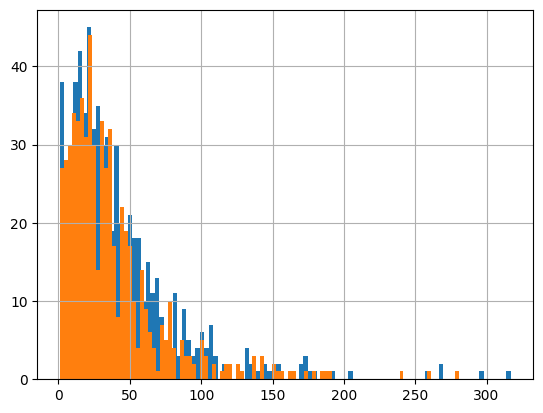

In [99]:
# Строим гистограммы для наших выборок
working_months.hist(bins = 100)
not_working_months.hist(bins = 100);

На графиках видим положительное распределение. Для сравнения двух выборок будем использовать непараметрический тест Манна-Уитни (или U-тест).

In [100]:
# Применим функцию U_test к нашим выборкам
U_test(working_months, not_working_months)

0.013
Отвергаем нулевую гипотезу


В данном случае отвергаем нулевую гипотезу: существуют различия между средними количествами просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие. В данном случае *p-value* (равный 0,013) меньше уровня статистической значимости *alpha* (0,05), поэтому результат является статистически значимым. Различие в средних количествах просмотров у вакансий, опубликованных в рабочие месяцы и не рабочие составило 13%.

### Гипотеза № 5 о различии среднего количества просмотров у вакансий в области разработки и в других областях

__Сформулируем нулевую и альтернативную гипотезы:__  

*Нулевая*: средние количества просмотров у вакансий в области разработки и в других областях равны.

*Альтернативная*: существуют различия между средними количествами просмотров у вакансий в области разработки и в других областях.

In [101]:
# назначим новые переменные и сделаем соответствующие вакантские выборки по анализируемым группам
development = data.query('specialization_development == 1')['views']
not_development = data.query('specialization_development == 0')['views']

# выведем количество вакансий в выборках, средние количества просмотров и разницу средних на экран
print('Количество вакансий в области разработки:', len(development))
print('Количество вакансий в других областях:', len(not_development))
print('Среднее количество просмотров вакансий в области разработки:', development.mean())
print('Среднее количество просмотров вакансий в других областях:', not_development.mean())
print(f'Разница средних количеств откликов: {development.mean() / not_development.mean()-1:.0%}')

Количество вакансий в области разработки: 406
Количество вакансий в других областях: 877
Среднее количество просмотров вакансий в области разработки: 38.80788177339902
Среднее количество просмотров вакансий в других областях: 40.611174458380844
Разница средних количеств откликов: -4%


Посмотрим на распределения и выбросы.

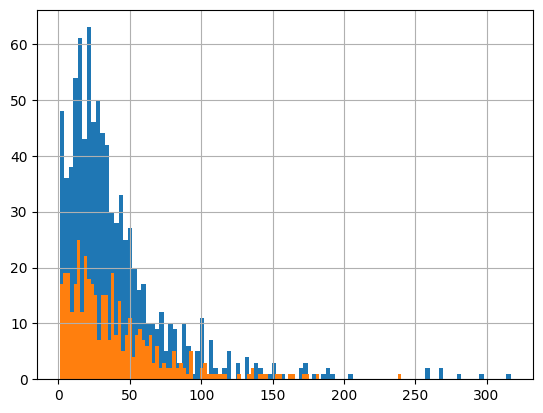

In [102]:
# Строим гистограммы для наших выборок
not_development.hist(bins = 100)
development.hist(bins = 100);

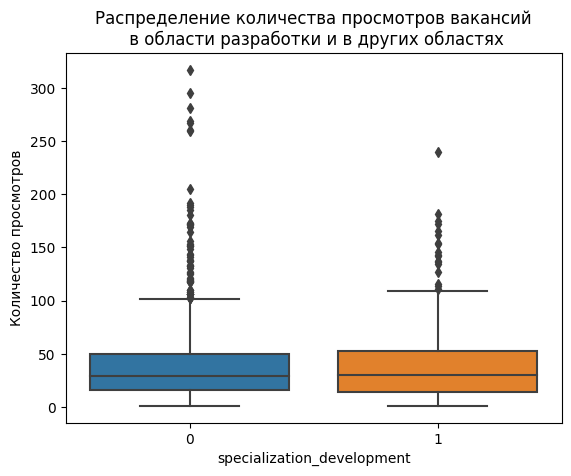

In [103]:
# Строим "ящик с усами"
sns.boxplot(y = 'views', data= data.query('specialization_development in [0,1]'), x ='specialization_development').set(
            title="Распределение количества просмотров вакансий\n в области разработки и в других областях", 
            ylabel="Количество просмотров");

На графиках видим положительное распределение и достаточно большое количество выбросов в обоих выборках, которые влияют на среднее значение. Для сравнения двух выборок будем использовать непараметрический тест Манна-Уитни (или U-тест).

In [104]:
# Применим функцию U_test к нашим выборкам
U_test(development, not_development)

0.698
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу: средние количества просмотров у вакансий в области разработки и в других областях равны. В данном случае, так как *p-value* (равный 0,698) больше уровня статистической значимости *alpha* (0,05), то результат не является статистически значимым.

### Гипотеза № 6 о различии среднего количества просмотров у вакансий, закрытых кадровым агенством и закрытых/отклоненых другими

__Сформулируем нулевую и альтернативную гипотезы:__  

*Нулевая*: средние количества просмотров вакансий, закрытых кадровым агенством и закрытых/отклоненых другими равны.

*Альтернативная*: существуют различия между средними количествами просмотров вакансий, закрытых кадровым агенством и закрытых/отклоненых другими.

In [105]:
# назначим новые переменные и сделаем соответствующие вакантские выборки по анализируемым группам
closed_by_us = data.query('status == "Закрыта нами"')['views']
not_closed_by_us = data.query('status == "Архив" or status == "Отклонена"')['views']

# выведем количество вакансий в выборках, средние количества просмотров и разницу средних на экран
print('Количество вакансий, закрытых КА:', len(closed_by_us))
print('Количество вакансий, закрытых/отклоненых другими:', len(not_closed_by_us))
print('Среднее количество просмотров в вакансиях, закрытых КА:', closed_by_us.mean())
print('Среднее количество просмотров в вакансиях, закрытых/отклоненых другими:', not_closed_by_us.mean())
print(f'Разница средних количеств просмотров: {closed_by_us.mean() / not_closed_by_us.mean()-1:.0%}')

Количество вакансий, закрытых КА: 320
Количество вакансий, закрытых/отклоненых другими: 806
Среднее количество просмотров в вакансиях, закрытых КА: 49.684375
Среднее количество просмотров в вакансиях, закрытых/отклоненых другими: 34.53473945409429
Разница средних количеств просмотров: 44%


Посмотрим на распределения и выбросы.

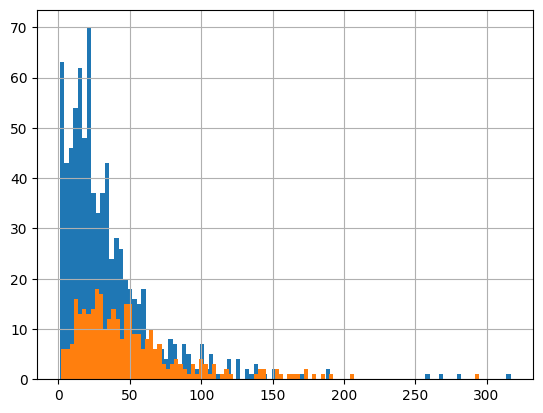

In [106]:
# Строим гистограммы для наших выборок
not_closed_by_us.hist(bins = 100)
closed_by_us.hist(bins = 100);

На графиках видим положительное распределение. Для сравнения двух выборок будем использовать непараметрический тест Манна-Уитни (или U-тест).

In [107]:
# Применим функцию U_test к нашим выборкам
U_test(closed_by_us, not_closed_by_us)

0.0
Отвергаем нулевую гипотезу


В данном случае отвергаем нулевую гипотезу: существуют различия между средними количествами просмотров вакансий, закрытых кадровым агенством и закрытых/отклоненых другими. В данном случае *p-value* (равный 0) меньше уровня статистической значимости *alpha* (0,05), поэтому результат является статистически значимым. Различие в средних количествах просмотров у вакансий, закрытых кадровым агенством и закрытых/отклоненых другими составило 44%.

## Итоговые выводы и рекомендации для заказчика

Исходя из проведенного анализа данных и результатов проверки гипотез, можно сделать следующие выводы:

1. Вакансии, опубликованные в рабочие месяцы, получают больше просмотров, чем в не рабочие (январь, май, июнь, июль, август). Больше всего просмотров и откликов у вакансий, опубликованных в августе, а наименьшее количество - в декабре и феврале.
2. Вакансии для новичков имеют более высокие средние показатели просмотров и откликов, чем вакансии для кандидатов с опытом. 
3. Вакансии без опыта работы привлекают больше просмотров и откликов, чем вакансии, требующие опыт.
4. Область разработки лидирует по количеству размещенных вакансий, но в среднем получает меньше просмотров, чем другие области. А вакансии в области дизайна и тестирования пользуются большим спросом по сравнению с вакансиями в области разработки.
5. Указание зарплаты или формата работы не оказывает значительного влияния на количество просмотров и откликов на вакансии.
6. Вакансии с удаленной работой привлекают в два раза больше просмотров и откликов, чем вакансии с офисной работой.
7. Средние количества просмотров вакансий, представленных в Москве и в других городах, не различаются.
8. Вакансии, закрытые кадровым агентством, получают больше просмотров, чем закрытые или отклоненные другими способами.

__Рекомендации:__

Проведенный анализ гипотез позволил лучше понять, какие факторы влияют на популярность и эффективность размещения вакансий. Несмотря на то, что некоторые гипотезы не были подтверждены статистически, полученные результаты могут быть полезны для оптимизации стратегии подбора персонала и увеличения привлекательности вакансий. 

Таким образом, для увеличения числа просмотров и откликов на вакансии рекомендуется уделить внимание публикации вакансий в периоды, когда спрос на них выше, а также акцентировать внимание на вакансиях для новичков, без опыта работы, области разработки,  дизайна и тестирования и удаленной работы, а также рассмотреть возможность сотрудничества с кадровыми агентствами.

Дальнейшие исследования и анализ данных могут помочь улучшить стратегию подбора персонала и повысить эффективность процесса найма.